# DATA MINING PROJECT 05.06.2022

__Problem 1: Clustering__

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

__Data Dictionary for Market Segmentation:__

spending: Amount spent by the customer per month (in 1000s)

advance_payments: Amount paid by the customer in advance by cash (in 100s)

probability_of_full_payment: Probability of payment done in full by the customer to the bank

current_balance: Balance amount left in the account to make purchases (in 1000s)

credit_limit: Limit of the amount in credit card (10000s)

min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('bright')
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

__1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).__

In [131]:
prob1_data= pd.read_csv('bank_marketing_part1_Data.csv')

In [132]:
prob1_data.shape

(210, 7)

In [133]:
prob1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [134]:
prob1_data.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [135]:
prob1_data.duplicated().sum()

0

In [136]:
prob1_data.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


__From the above table below are the observations.__

Spending which is the target variable looks like it’s normally distributed as we can see that mean and median are same.

advance_payments also seems to be normally distributed. This variable might be of use as it shows that customers are paying the amount in advance which is timely payment for the bank.

The average probability_of_full_payment is 87.10%. Hence we need to analyse further to see the rest of the customers who fall under 13% who have not done the payment in full. This variable is normally distributed.

Minimum current_balance held by customer is 4899.00.

credit_limit of customers range between 26300.00 to 40330.00. The average credit_limit of customers is 32586.05.

The minimum of min_payment_amt paid is 76.51. The maximum of min_payment_amt paid is 845.60. This suggests the data is widely spread for this variable and might have outliers. Also looks like normally distributed.

The average of max_spent_in_single_shopping is 5408.07. The maximum of max_spent_in_single_shopping is 6550.00.

__Univariate Analysis__

In [137]:
prob1_data_dup = prob1_data

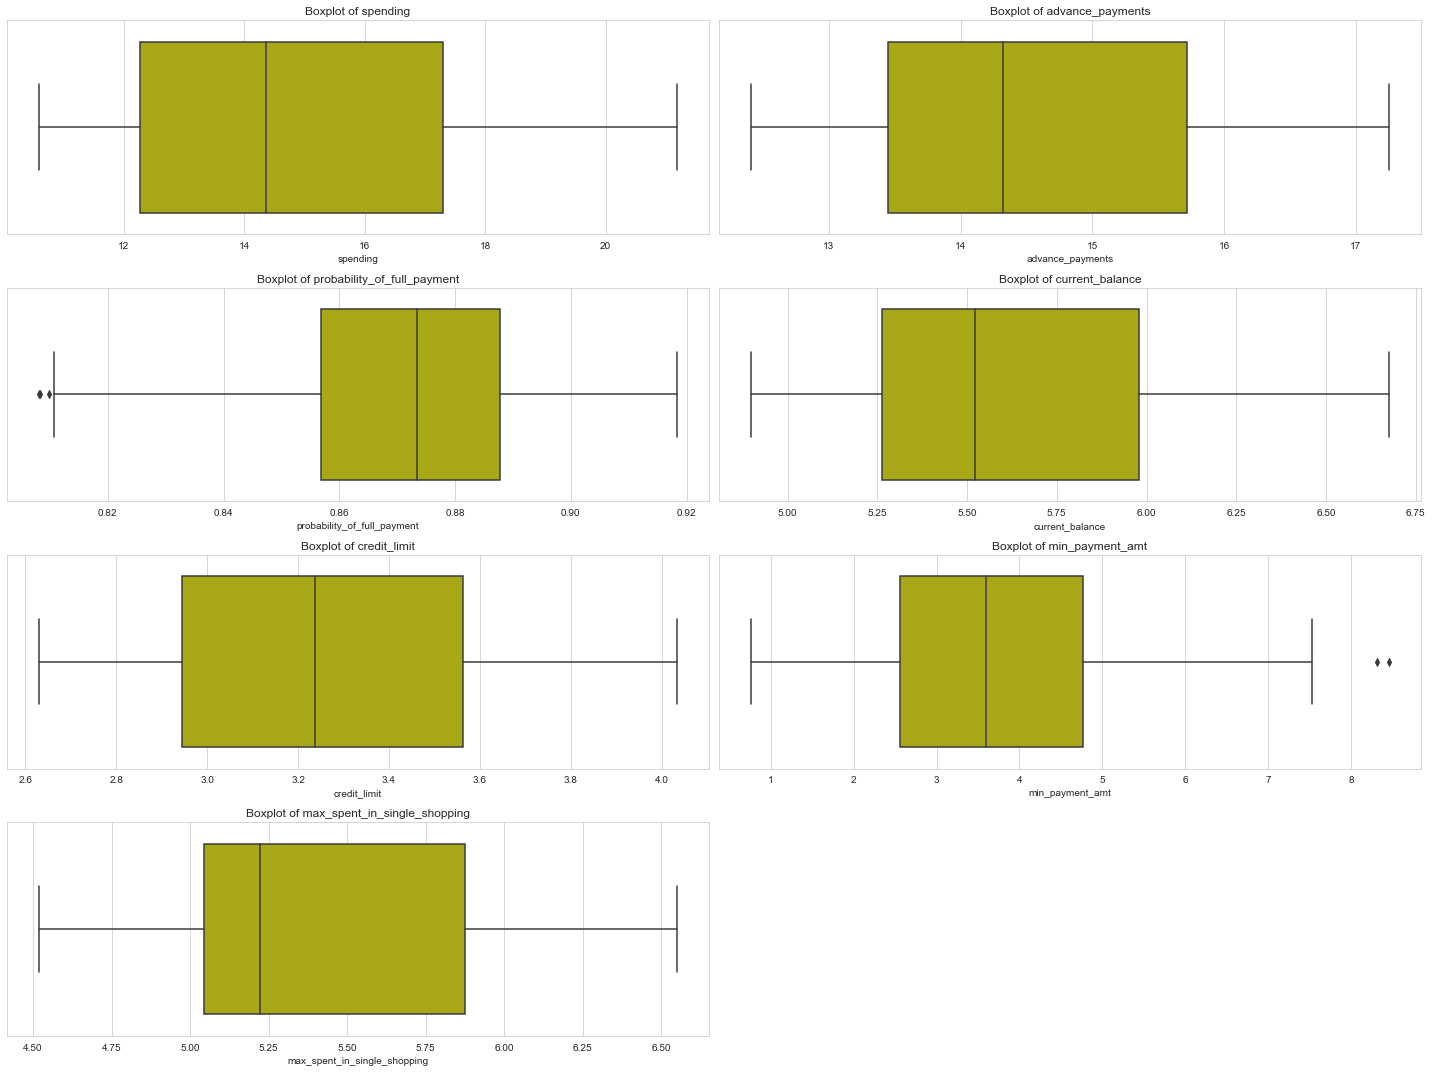

In [138]:
plt.figure(figsize = (20,15))
feature_list = prob1_data_dup.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=prob1_data_dup[feature_list[i]], data=prob1_data_dup, orient='h', color='y')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

__Distribution Plots__

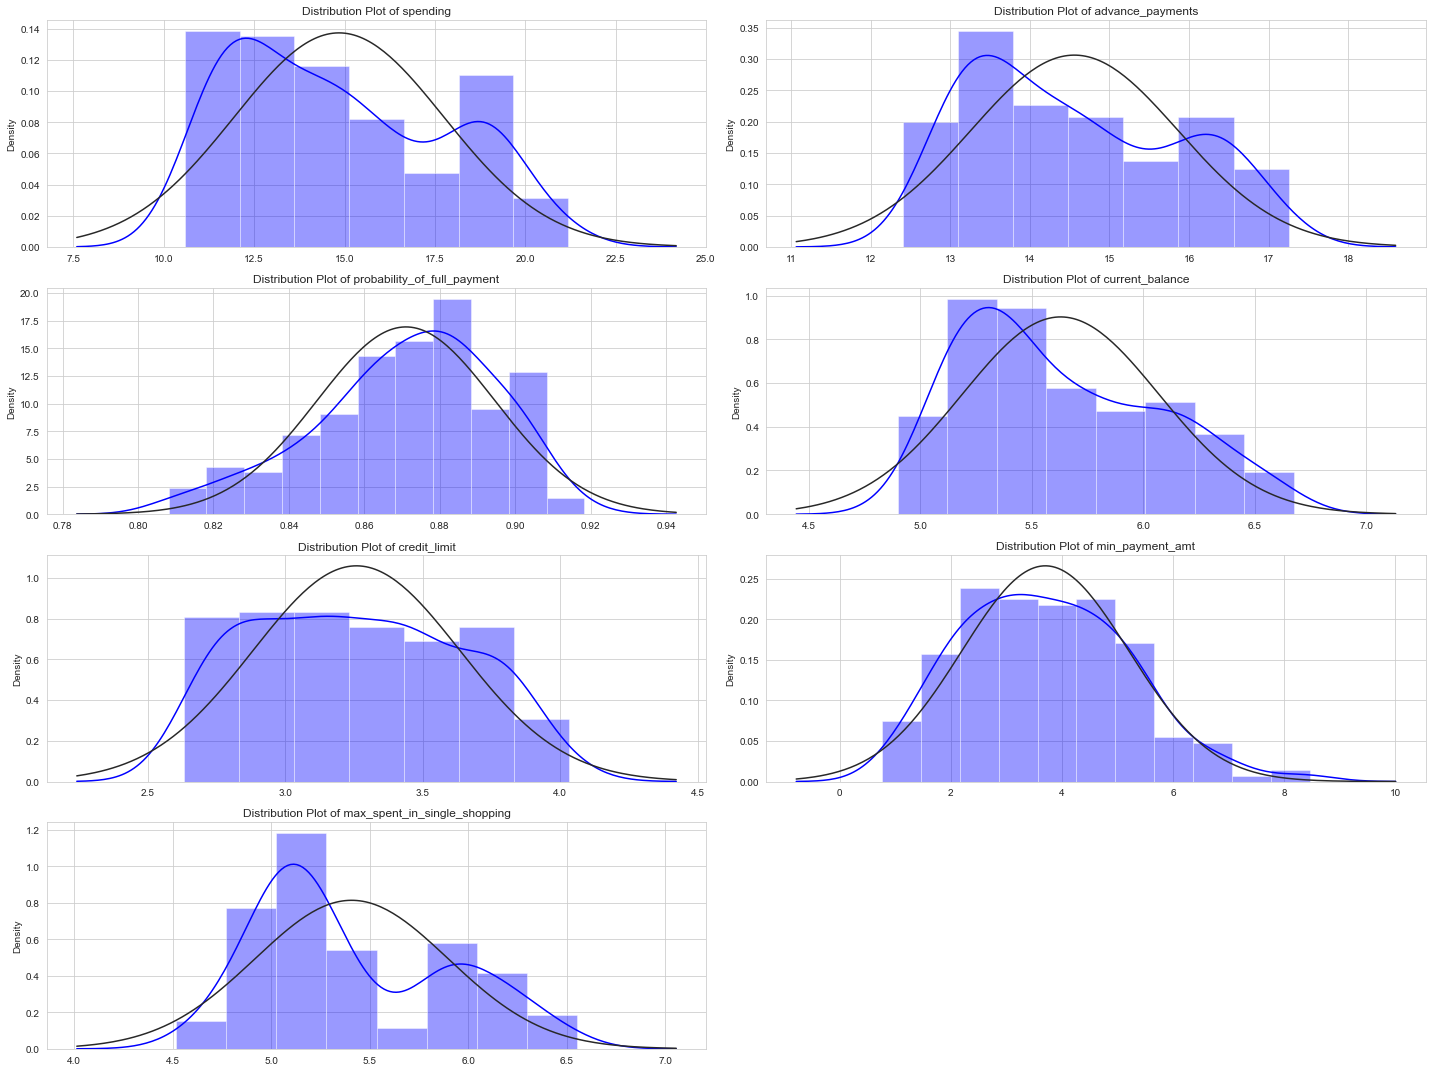

In [139]:
plt.figure(figsize = (20,15))
feature_list = prob1_data_dup.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.distplot(x=prob1_data_dup[feature_list[i]], color='b', fit=norm)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

__Skewness and Kurtosis__

In [140]:
for columns in prob1_data_dup.columns:
    print('Skewness of {} is'.format(columns), round(prob1_data_dup[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(prob1_data_dup[columns].kurt(),2))

Skewness of spending is 0.4
Kurtosis of spending is -1.08
Skewness of advance_payments is 0.39
Kurtosis of advance_payments is -1.11
Skewness of probability_of_full_payment is -0.54
Kurtosis of probability_of_full_payment is -0.14
Skewness of current_balance is 0.53
Kurtosis of current_balance is -0.79
Skewness of credit_limit is 0.13
Kurtosis of credit_limit is -1.1
Skewness of min_payment_amt is 0.4
Kurtosis of min_payment_amt is -0.07
Skewness of max_spent_in_single_shopping is 0.56
Kurtosis of max_spent_in_single_shopping is -0.84


__Bivariate Analysis__

Pairplots

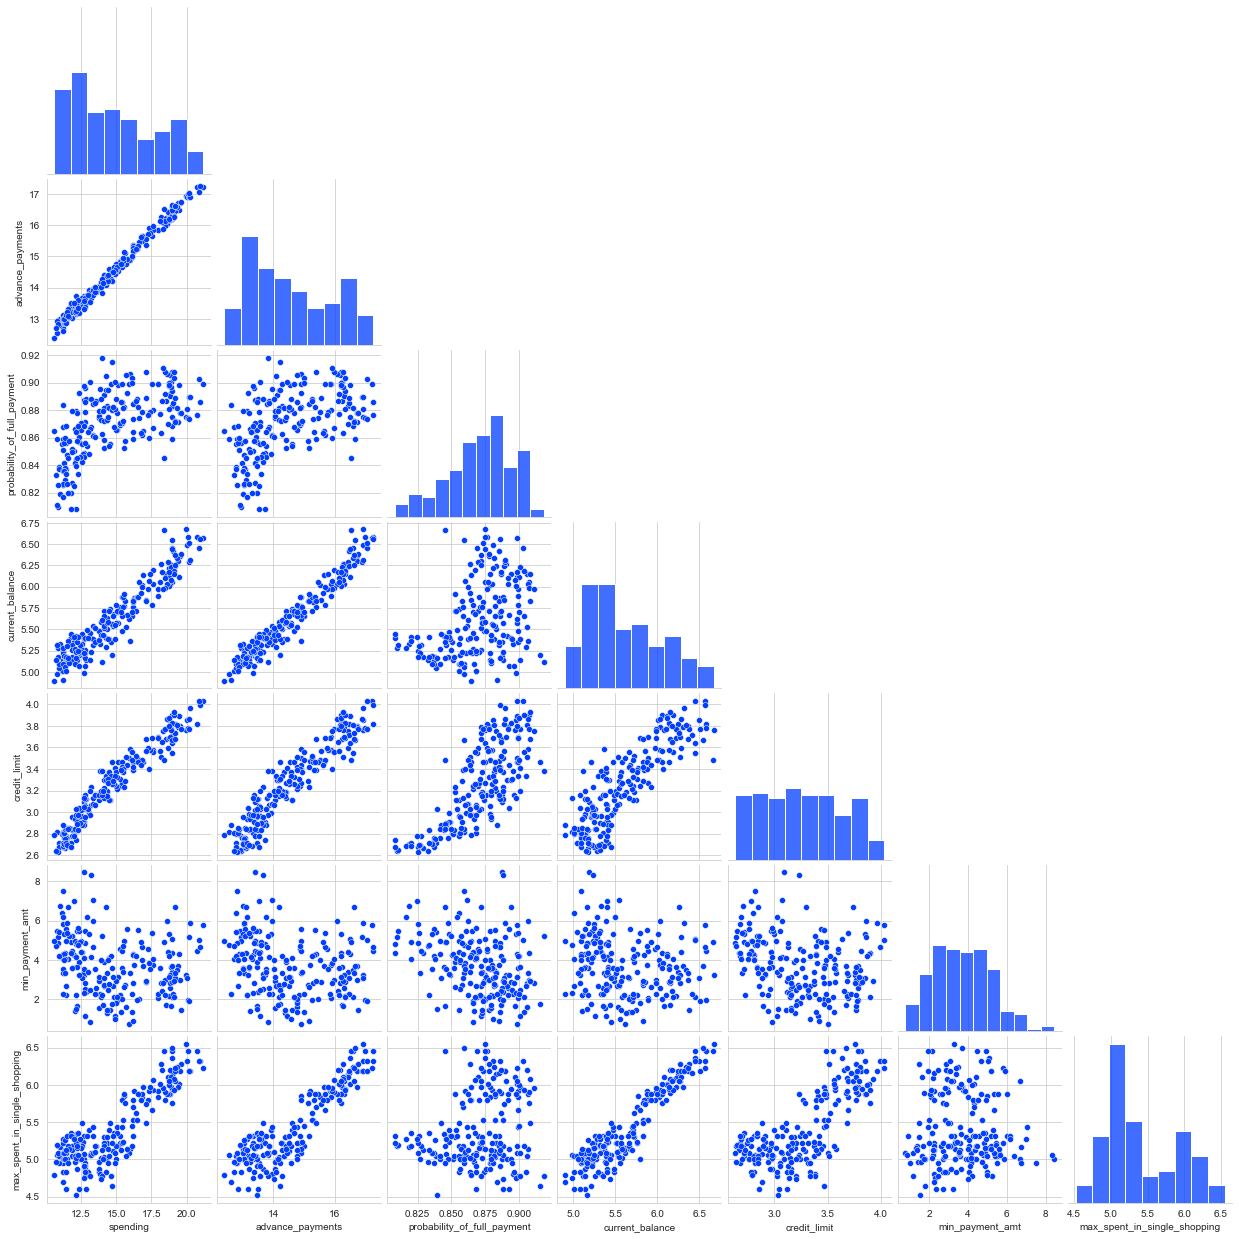

In [141]:
sns.pairplot(prob1_data_dup, corner=True);

Lmplots

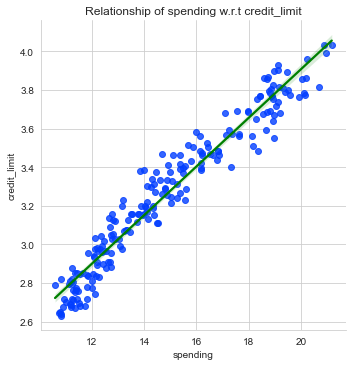

In [142]:
sns.lmplot(x='spending', y='credit_limit', data=prob1_data_dup, palette="Set1", line_kws={'color': 'green'});
plt.title('Relationship of spending w.r.t credit_limit');

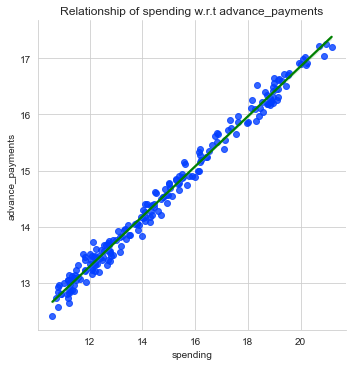

In [143]:
sns.lmplot(x='spending', y='advance_payments', data=prob1_data_dup, palette="Set1", line_kws={'color': 'green'});
plt.title('Relationship of spending w.r.t advance_payments');

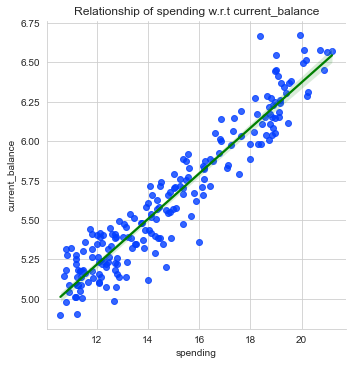

In [144]:
sns.lmplot(x='spending', y='current_balance', data=prob1_data_dup, palette="Set1", line_kws={'color': 'green'});
plt.title('Relationship of spending w.r.t current_balance');

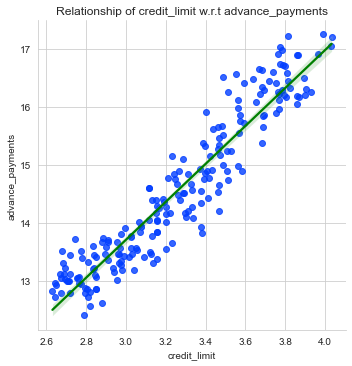

In [145]:
sns.lmplot(x='credit_limit', y='advance_payments', data=prob1_data_dup, palette="Set1", line_kws={'color': 'green'});
plt.title('Relationship of credit_limit w.r.t advance_payments');

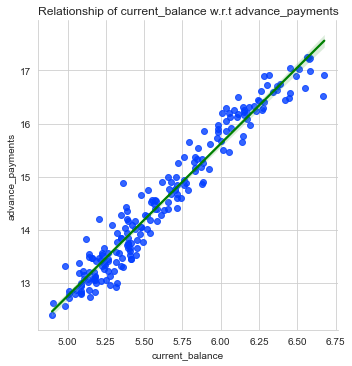

In [146]:
sns.lmplot(x='current_balance', y='advance_payments', data=prob1_data_dup, palette="Set1", line_kws={'color': 'green'});
plt.title('Relationship of current_balance w.r.t advance_payments');

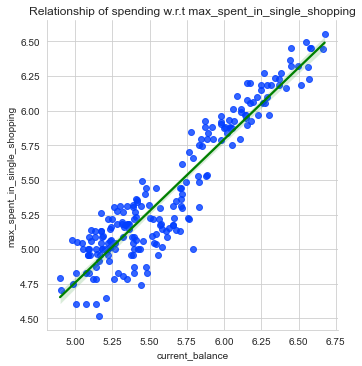

In [147]:
sns.lmplot(x='current_balance', y='max_spent_in_single_shopping', data=prob1_data_dup, palette="Set1", line_kws={'color': 'green'});
plt.title('Relationship of spending w.r.t max_spent_in_single_shopping');

__Correlation Heatmaps__

In [148]:
corr = prob1_data_dup.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


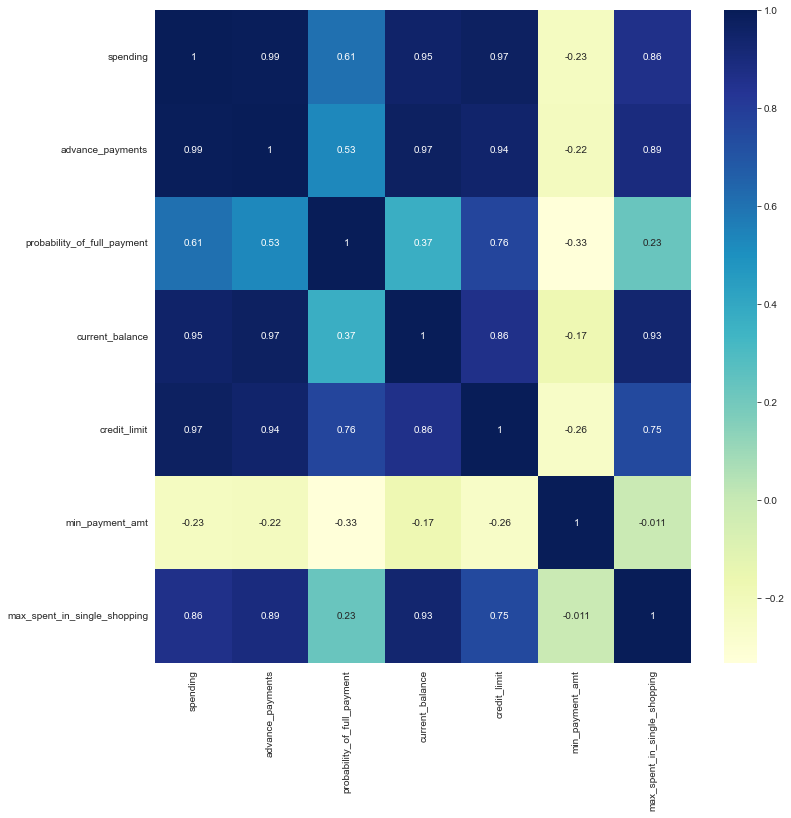

In [149]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='YlGnBu');
plt.show();

From the above pairplot and correlation heatmaps, we can see that there is positive linear relationship between advance_payments and spending, current_balance and spending, credit_limit and spending, current_balance and advance_payments, credit_limit and advance_payments, max_spent_in_single_shopping and current_balance. This suggests that there is Multicollinearity between the variables.

__1.2  Do you think scaling is necessary for clustering in this case? Justify__

Scaling or Standardization is an important step in data pre-processing. Most of the machine learning models use scaled data unless the data in hand is naturally scaled.

Let us see the variances between variables in the provided dataset.

In [150]:
prob1_data_dup.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000558
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.260684
max_spent_in_single_shopping    0.241553
dtype: float64

From the above table though there is not much variance between most of the variables, our target variable spending has a variance of 8.46 whereas other variables variance lie between 0 and 2. Hence scaling is necessary.

We will be using the Standard Scaler method for scaling our data. This method will calculate the z-score for each data point and then scale the data such that mean = 0 and variance/standard deviation = 1.

In [151]:
sc = StandardScaler()

In [152]:
scaled_prob1_data_dup = sc.fit_transform(prob1_data_dup)

In [153]:
scaled_prob1_data_dup

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [154]:
scaled_prob1_data_dup.shape

(210, 7)

In [155]:
scaled_prob1_data_dup = pd.DataFrame(scaled_prob1_data_dup, index=prob1_data_dup.index, columns=prob1_data_dup.columns)

In [156]:
scaled_prob1_data_dup

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


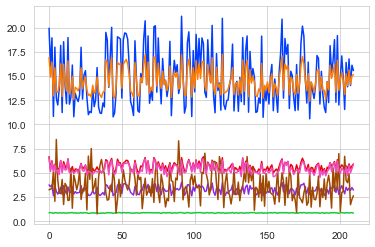

In [157]:
plt.plot(prob1_data_dup)
plt.show()

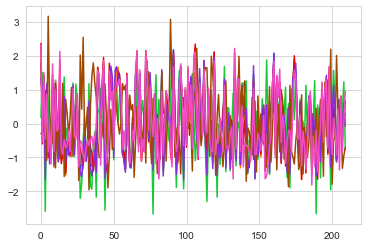

In [158]:
plt.plot(scaled_prob1_data_dup)
plt.show()

__1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them__

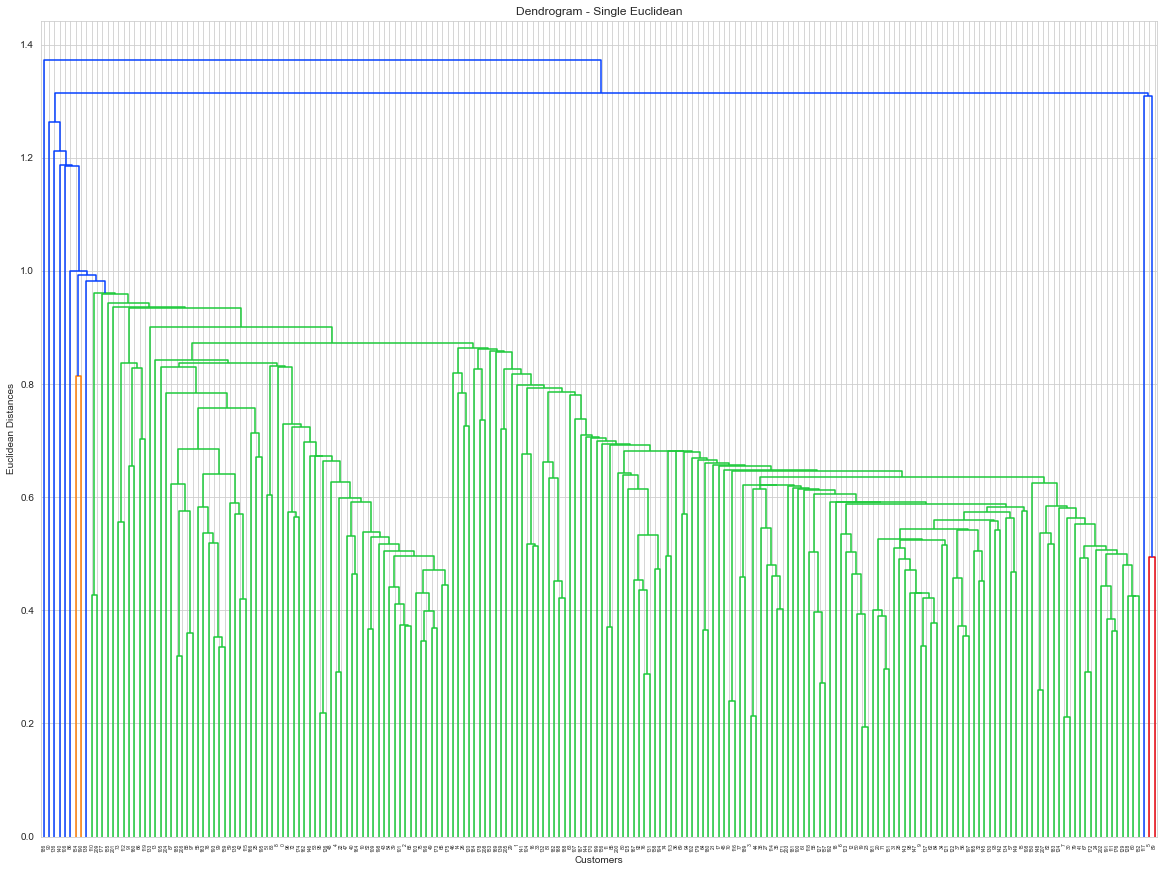

In [159]:
plt.figure(figsize = (20,15))
link1 = linkage(scaled_prob1_data_dup, method='single', metric='euclidean')
dend1 = dendrogram(link1)
plt.title('Dendrogram - Single Euclidean')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show();

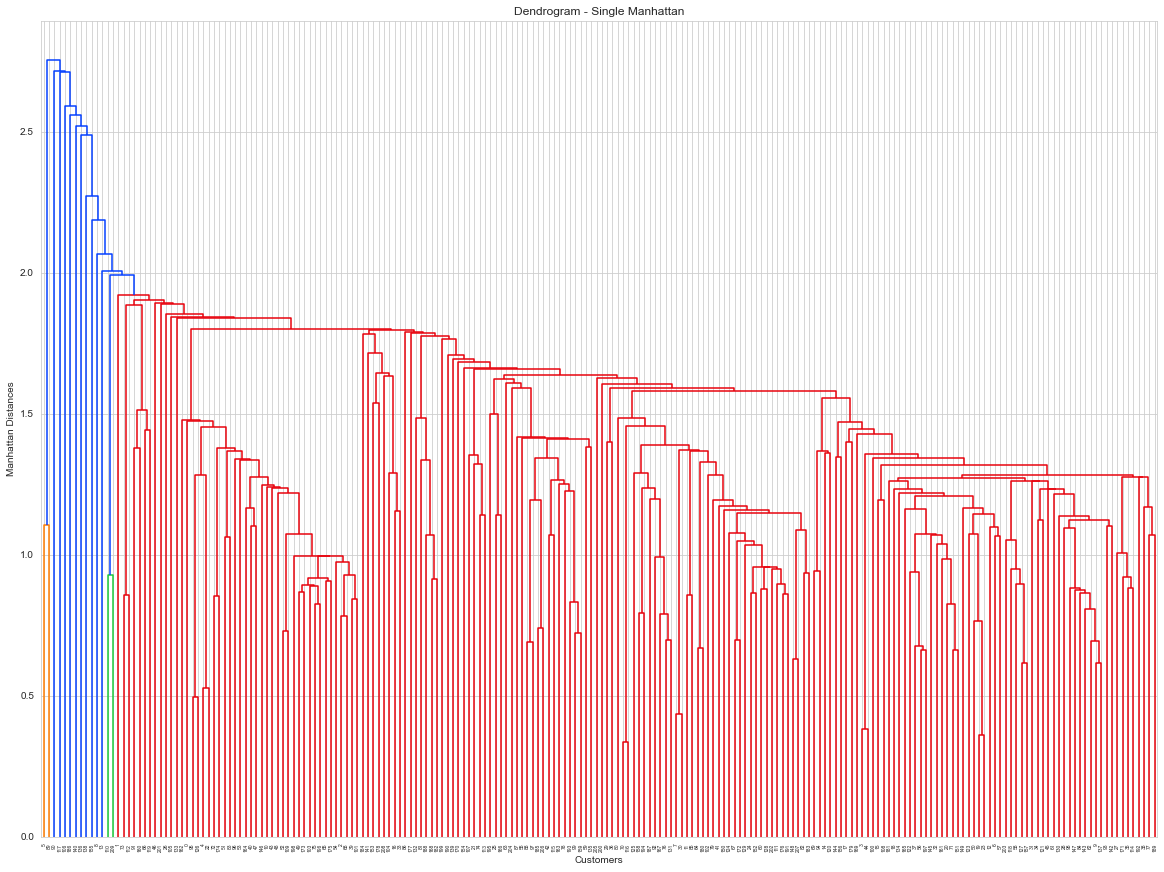

In [160]:
plt.figure(figsize=(20,15))
link2 = linkage(scaled_prob1_data_dup, method='single', metric='cityblock')
dend2 = dendrogram(link2)
plt.title('Dendrogram - Single Manhattan')
plt.xlabel('Customers')
plt.ylabel('Manhattan Distances')
plt.show();

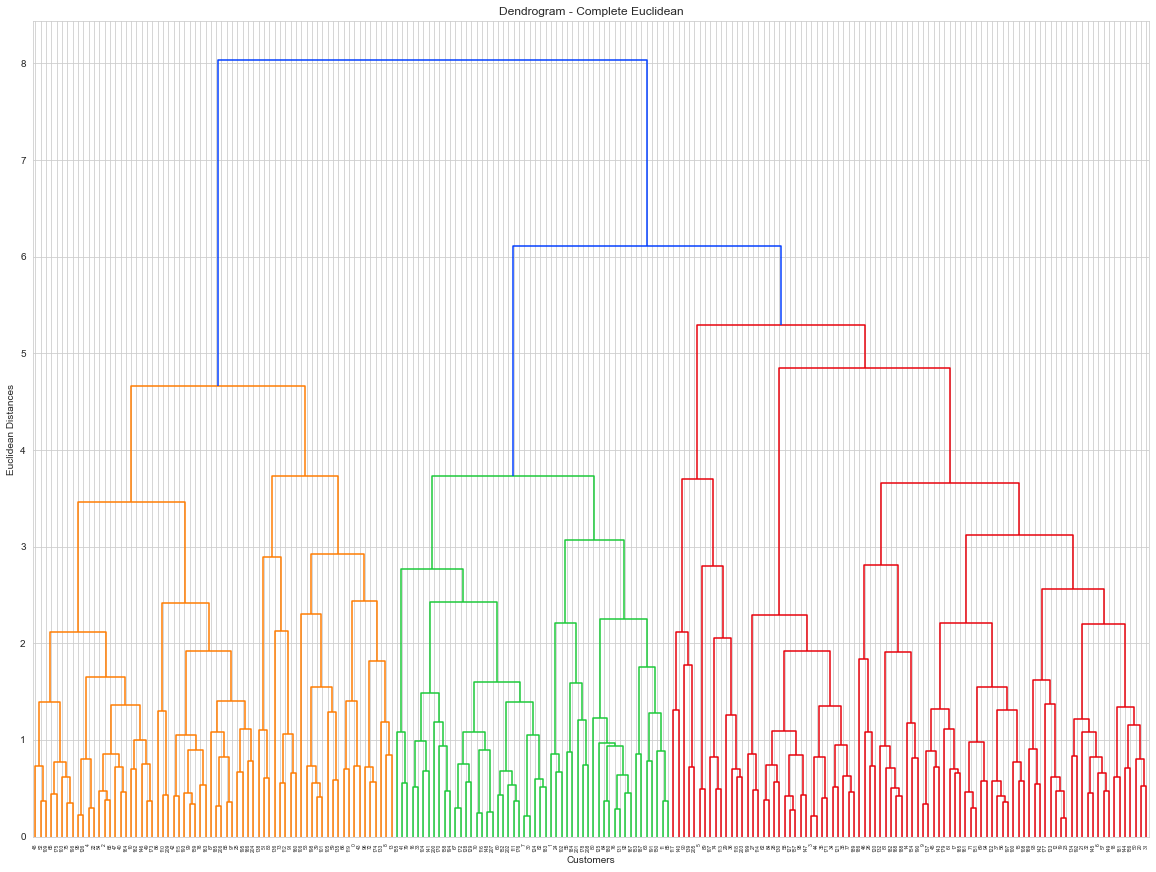

In [161]:
plt.figure(figsize = (20,15))
link3 = linkage(scaled_prob1_data_dup, method='complete', metric='euclidean')
dend3 = dendrogram(link3)
plt.title('Dendrogram - Complete Euclidean')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show();

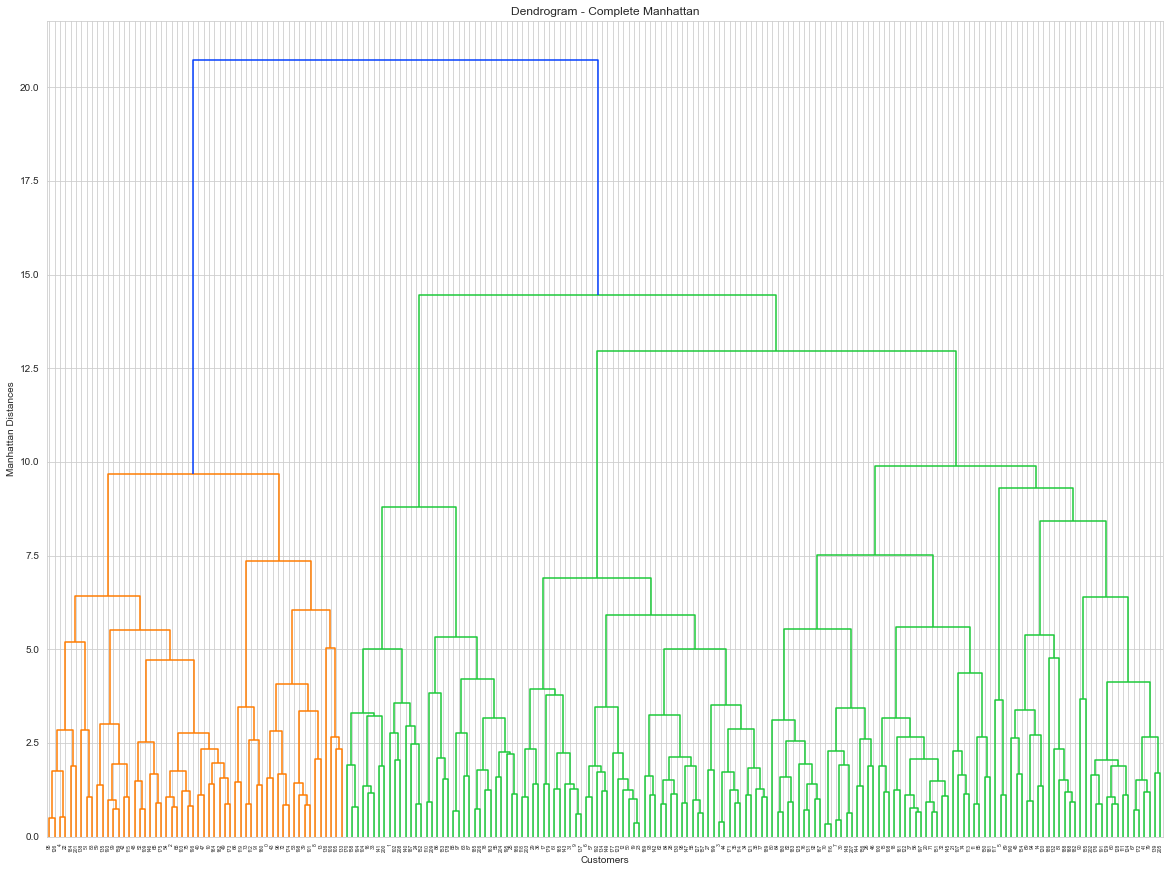

In [162]:
plt.figure(figsize=(20,15))
link4 = linkage(scaled_prob1_data_dup, method='complete', metric='cityblock')
dend4 = dendrogram(link4)
plt.title('Dendrogram - Complete Manhattan')
plt.xlabel('Customers')
plt.ylabel('Manhattan Distances')
plt.show();

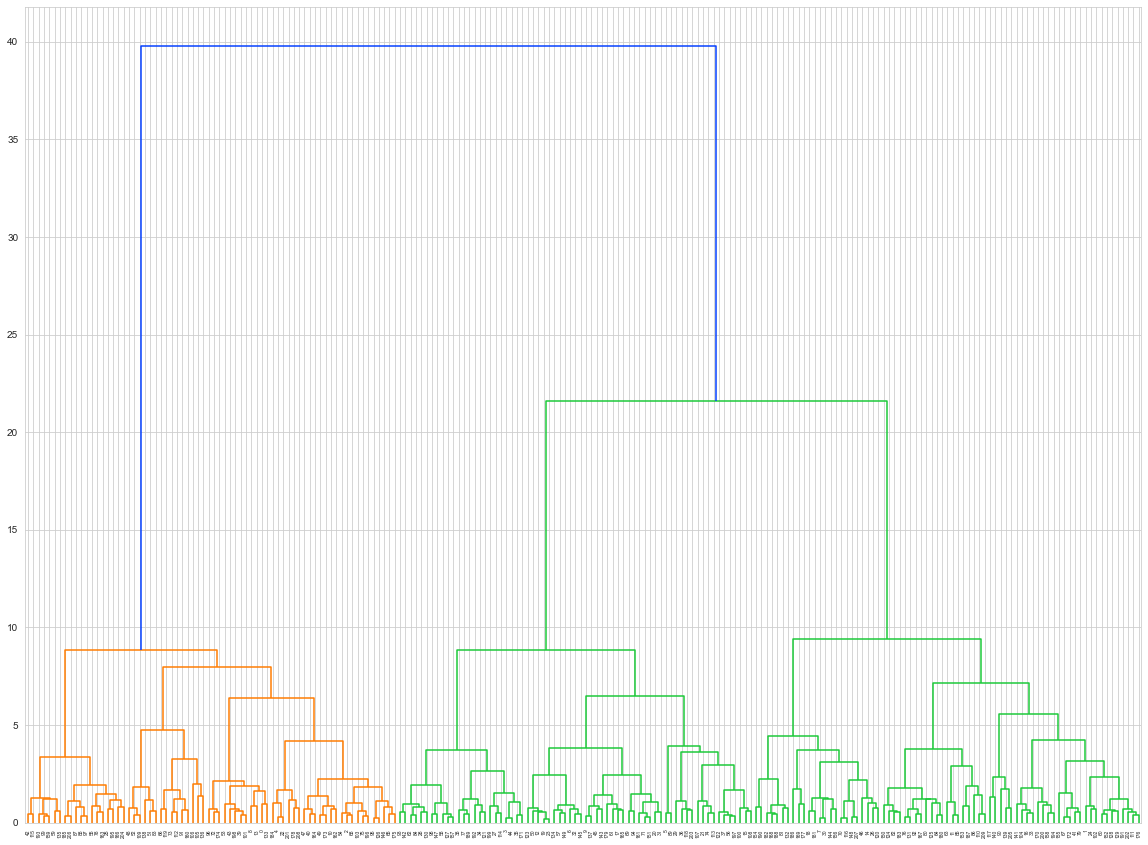

In [163]:
plt.figure(figsize=(20,15))
wardlink = linkage(scaled_prob1_data_dup, method='ward')
dend = dendrogram(wardlink)

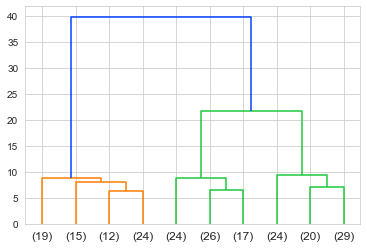

In [164]:
dend = dendrogram(wardlink, truncate_mode='lastp', p=10)

In [165]:
clusters = fcluster(wardlink, t=3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [166]:
# Adding the cluster profiles to the original dataset
prob1_data_dup['clusters'] = clusters

In [167]:
prob1_data_dup.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [206]:
# Cluster frequency
prob1_data_dup.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

__Cluster Profiles__

In [207]:
clust_data = prob1_data_dup.iloc[:,0:8].groupby('clusters').mean()
clust_data['frequency'] = prob1_data_dup.clusters.value_counts().sort_index()
clust_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


Hierarchical Clusters Scatterplot

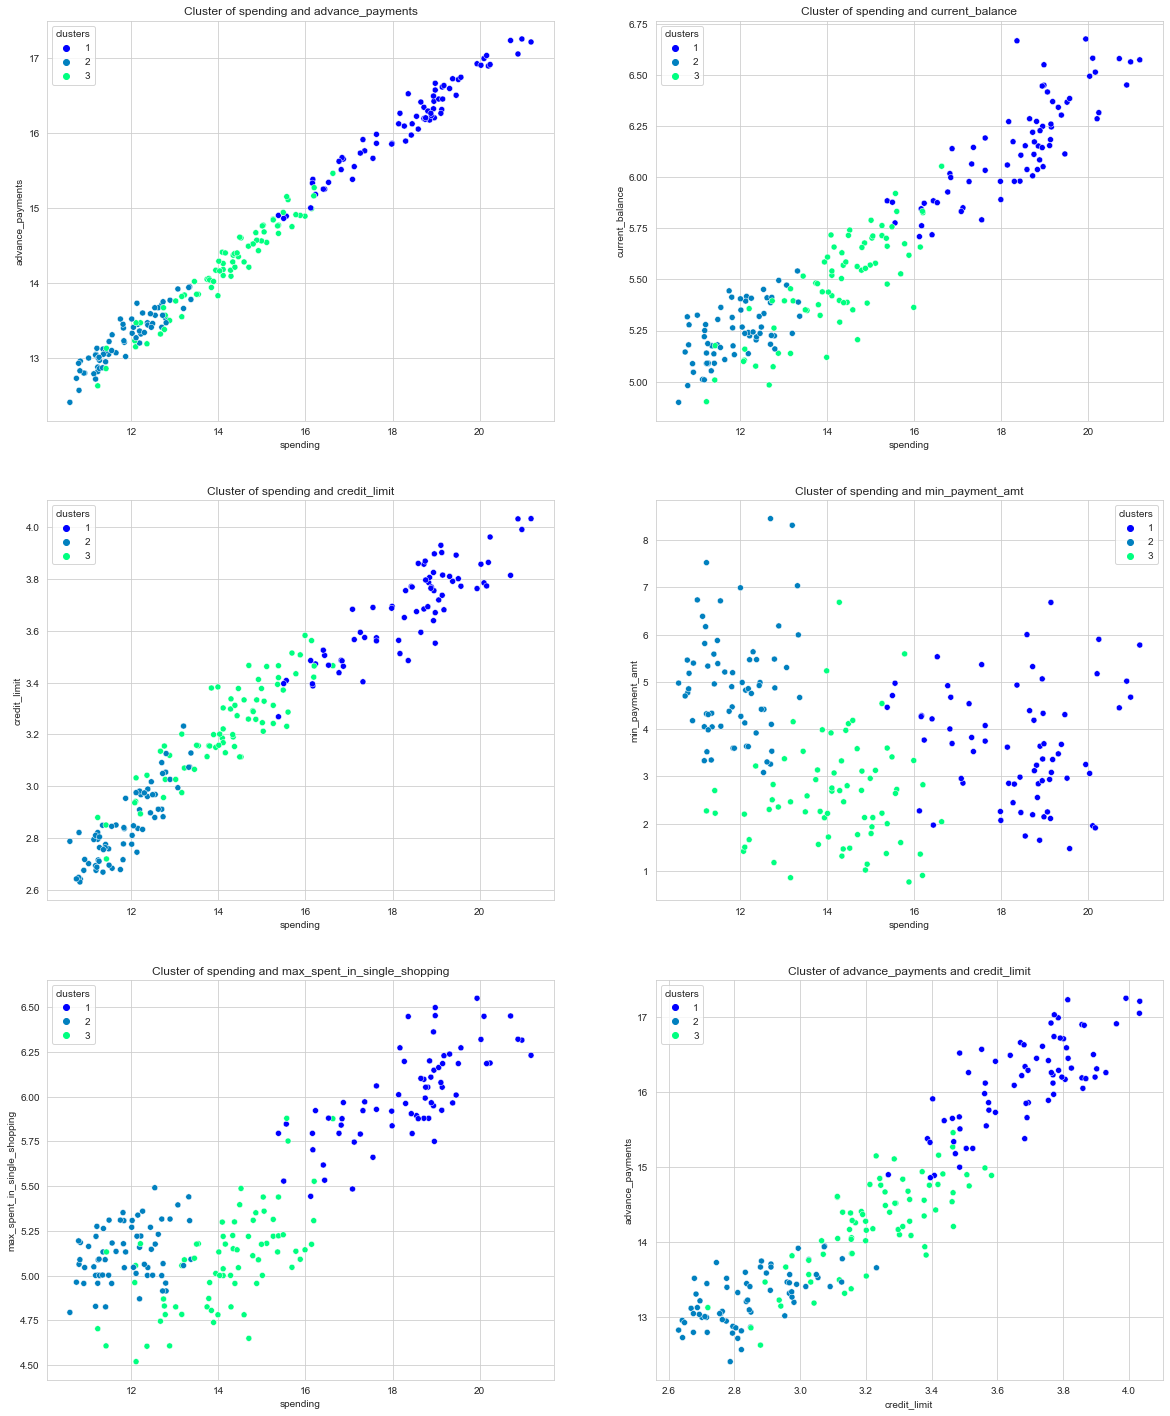

In [208]:
plt.figure(figsize=(20,25))

plt.subplot(3,2,1)
sns.scatterplot(y='advance_payments', x='spending', hue='clusters', data=prob1_data_dup, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and advance_payments')

plt.subplot(3,2,2)
sns.scatterplot(y='current_balance', x='spending', hue='clusters', data=prob1_data_dup, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and current_balance')

plt.subplot(3,2,3)
sns.scatterplot(y='credit_limit', x='spending', hue='clusters', data=prob1_data_dup, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and credit_limit');

plt.subplot(3,2,4)
sns.scatterplot(y='min_payment_amt', x='spending', hue='clusters', data=prob1_data_dup, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and min_payment_amt');

plt.subplot(3,2,5)
sns.scatterplot(y='max_spent_in_single_shopping', x='spending', hue='clusters', data=prob1_data_dup, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and max_spent_in_single_shopping');

plt.subplot(3,2,6)
sns.scatterplot(y='advance_payments', x='credit_limit', hue='clusters', data=prob1_data_dup, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and credit_limit');

__1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.__

In [209]:
# forming 3 clusters with K = 3
k_means = KMeans(n_clusters=3)

In [210]:
k_means.fit(scaled_prob1_data_dup)

KMeans(n_clusters=3)

In [211]:
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0], dtype=int32)

In [212]:
k_means.inertia_

430.65897315130064

In [213]:
# Forming clusters with K = 1,3,4,5,6 and comparing the WSS
k_means1 = KMeans(n_clusters = 1)
k_means1.fit(scaled_prob1_data_dup)
k_means1.inertia_

1607.923809523809

In [214]:
k_means2 = KMeans(n_clusters = 2)
k_means2.fit(scaled_prob1_data_dup)
k_means2.inertia_

713.1763658360286

In [215]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_prob1_data_dup)
k_means3.inertia_

430.65897315130064

In [216]:
k_means4 = KMeans(n_clusters = 4)
k_means4.fit(scaled_prob1_data_dup)
k_means4.inertia_

384.646780263785

In [217]:
k_means5 = KMeans(n_clusters = 5)
k_means5.fit(scaled_prob1_data_dup)
k_means5.inertia_

345.152404258684

In [218]:
k_means6 = KMeans(n_clusters = 6)
k_means6.fit(scaled_prob1_data_dup)
k_means6.inertia_

306.1786580791046

WSS scores keep reducing as we increase the number of clusters

Calculating WSS for other values of K - Elbow Method¶

In [219]:
wss = []

In [220]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_prob1_data_dup)
    wss.append(KM.inertia_)

In [221]:
wss

[1607.923809523809,
 713.1763658360286,
 430.65897315130064,
 384.646780263785,
 345.3834038563942,
 305.69534880699825,
 278.1122508265127,
 250.4422884805579,
 233.65575163407567,
 211.9964783166695]

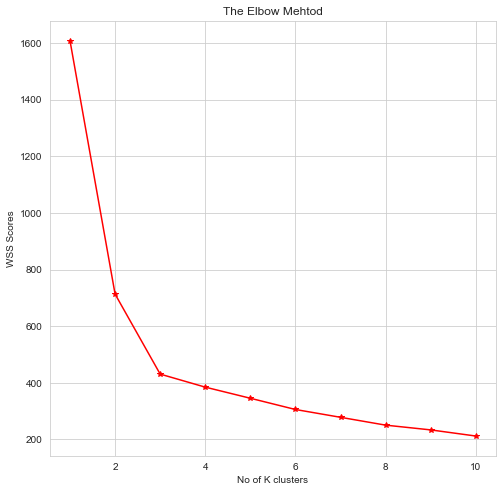

In [222]:
plt.figure(figsize=(8,8))
plt.plot(range(1,11), wss, marker='*', color='r');
plt.title('The Elbow Mehtod')
plt.xlabel('No of K clusters')
plt.ylabel('WSS Scores')
plt.show();

Cluster evaluation for 3 clusters: The Silhouette score

In [223]:
labels = k_means3.labels_
silhouette_score(scaled_prob1_data_dup,labels)

0.459124296899477

In [224]:
sil_width = []

In [225]:
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_prob1_data_dup)
    labels = KM.labels_
    sil = silhouette_score(scaled_prob1_data_dup,labels)
    print('i ', i, sil)
    sil_width.append(sil)

i  2 0.496974358929625
i  3 0.459124296899477
i  4 0.37247777270174076
i  5 0.29981282460589315
i  6 0.2582209600382977
i  7 0.2560574107923223
i  8 0.26736082644993575
i  9 0.2627853725860298
i  10 0.25232649060826534


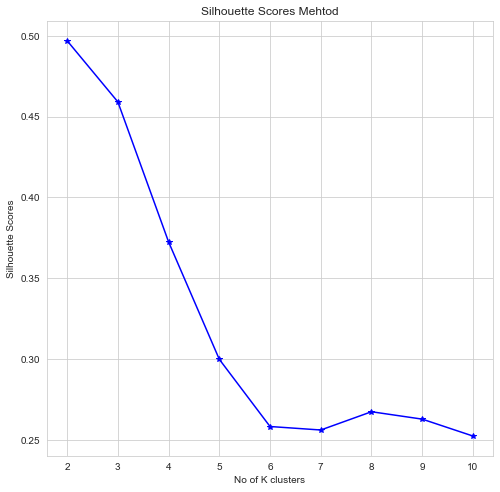

In [226]:
plt.figure(figsize=(8,8))
plt.plot(range(2,11), sil_width, marker='*', color='b')
plt.title('Silhouette Scores Mehtod')
plt.xlabel('No of K clusters')
plt.ylabel('Silhouette Scores')
plt.show();

Silhouette score is the best for 3 clusters hence we will go with 3 cluster profiling for this dataset

In [227]:
scaled_prob1_data_dup

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,k_clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,2
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,0
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,2
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,1
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,2
...,...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631,0
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153,2
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235,0
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238,0


In [228]:
df_kmeans = scaled_prob1_data_dup

In [229]:
# Adding the cluster profiles to the original dataset
df_kmeans['k_clusters'] = k_means3.labels_
df_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,k_clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,0
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


In [230]:
# Cluster frequency
df_kmeans['k_clusters'].value_counts().sort_index()

0    71
1    67
2    72
Name: k_clusters, dtype: int64

Cluster profiles

In [231]:
aggdata_kmeans = df_kmeans.iloc[:,0:8].groupby('k_clusters').mean()
aggdata_kmeans['frequency'] = df_kmeans.k_clusters.value_counts().sort_index()
aggdata_kmeans

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
k_clusters,,,,,,,,
0,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893,71
1,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308,67
2,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809,72


K-means Clusters Scatterplot

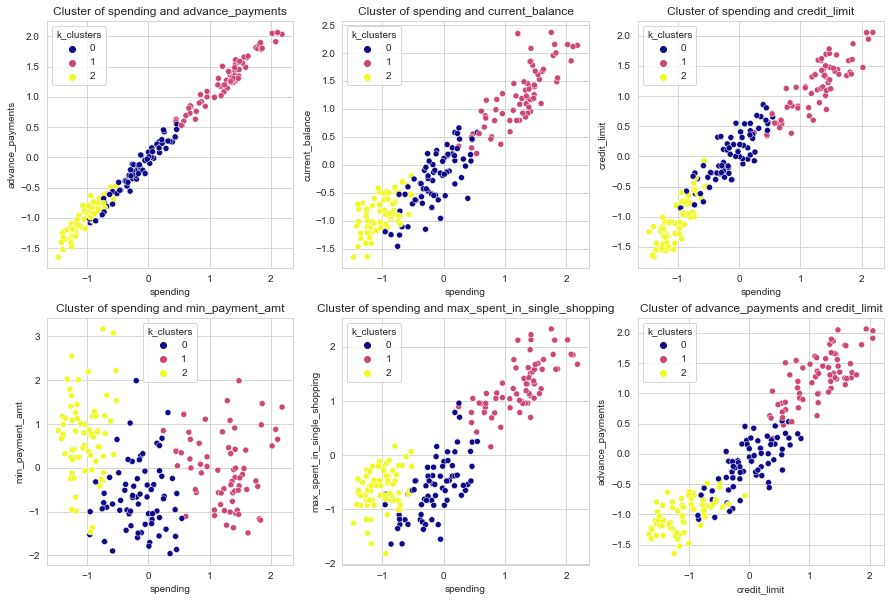

In [232]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.scatterplot(y='advance_payments', x='spending', hue='k_clusters', data=df_kmeans, palette='plasma')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and advance_payments')

plt.subplot(2,3,2)
sns.scatterplot(y='current_balance', x='spending', hue='k_clusters', data=df_kmeans, palette='plasma')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and current_balance')

plt.subplot(2,3,3)
sns.scatterplot(y='credit_limit', x='spending', hue='k_clusters', data=df_kmeans, palette='plasma')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and credit_limit');

plt.subplot(2,3,4)
sns.scatterplot(y='min_payment_amt', x='spending', hue='k_clusters', data=df_kmeans, palette='plasma')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and min_payment_amt');

plt.subplot(2,3,5)
sns.scatterplot(y='max_spent_in_single_shopping', x='spending', hue='k_clusters', data=df_kmeans, palette='plasma')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and max_spent_in_single_shopping');

plt.subplot(2,3,6)
sns.scatterplot(y='advance_payments', x='credit_limit', hue='k_clusters', data=df_kmeans, palette='plasma')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and credit_limit');

## 3 Cluster Solution

In [233]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [234]:
#fitting the Kmeans 
km_3.fit(scaled_prob1_data_dup)
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2], dtype=int32)

In [235]:
#proportion of labels classified

pd.Series(km_3.labels_).value_counts()

1    72
2    71
0    67
dtype: int64

K-Means Clustering & Cluster Information

In [253]:
kmeans1_dataset=prob1_data.copy()

In [254]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_prob1_data_dup)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans1_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
cluster,,,,,,,,
1,14.4,14.3,0.9,5.5,3.3,2.7,5.1,2.9
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1,2.1
3,18.5,16.2,0.9,6.2,3.7,3.6,6.0,1.0


In [255]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [256]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,71,33.81
2,72,34.29
3,67,31.90


In [257]:
#transposing the cluster
cluster_3_T = kmeans_mean_cluster.T

In [258]:
cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0
clusters,2.9,2.1,1.0


__1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.__

__Business insights based on Cluster profiles:__

When we look at the final clusters merged with original dataset and take the average values for the variables, below are the recommendations for each cluster profile.

Cluster 1: Platinum customers Cluster 3: Gold customers Cluster 2: Silver customers

Customers under cluster 1 have a high spending, current balance, credit_limit and max_spent_in_single_shopping which clearly shows that they are premium high-net worth customers who make expensive purchases on their credit cards.

Customers under cluster 3 have a relatively lesser spending, current balance, credit_limit and max_spent_in_single_shopping which indicate that they are upper middle class customers. The bank can provide promotional offers to this segment such that they increase their spending and are potential customers who can move into premium segments.

Customers under cluster 2 have the least spending and credit_limits compared to other clusters. This signifies that they are customers who have recently bought credit cards or youths who have started working recently. Bank can provide customized offers to this segment to promote more spending on credit cards.

# PROBLEM 2

__An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.__

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

In [3]:
prob2_data = pd.read_csv("insurance_part2_data.csv")

In [4]:
prob2_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
prob2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


__Observation:__
- 10 variables
- Age, Commision, Duration, Sales are numeric variable
- rest are categorial variables
- 3000 records, no missing one
- 9 independant variable and one target variable - Clamied

In [6]:
# Are there any missing values ?
prob2_data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

Observation
No missing valune

In [7]:
prob2_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [8]:
## Intital descriptive analysis of the data

prob2_data.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,53.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,48.300,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,224.200,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,172.025,539.00


Observation
- duration has negative valu, it is not possible. Wrong entry.
- Commision & Sales- mean and median varies signficantly

In [9]:
prob2_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation
- Categorial code variable maximun unique count is 5

In [10]:
prob2_data.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


Observation
- Data looks good at first glance

In [11]:
prob2_data.tail(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2990,51,EPX,Travel Agency,No,0.00,Online,2,20.00,Customised Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2992,28,CWT,Travel Agency,No,11.88,Online,389,19.80,Customised Plan,ASIA
2993,36,EPX,Travel Agency,No,0.00,Online,234,10.00,Cancellation Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


Observation
- Data looks good at first glance

In [12]:
prob2_data.shape

(3000, 10)

# Geting unique counts of all Nominal Variables


In [13]:
for column in prob2_data[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',prob2_data[column].nunique())
    print(prob2_data[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




# Check for duplicate data

In [14]:
# Are there any duplicates ?
dups = prob2_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
prob2_data[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


# Removing Duplicates - Not removing them - no unique identifier, can be different customer.

Though it shows there are 139 records, but it can be of different customers, there is no customer ID or any unique identifier, so I am not dropping them off.

## Univariate Analysis

__Age variable__ 

In [15]:
print('Range of values: ', prob2_data['Age'].max()-prob2_data['Age'].min())

Range of values:  76


In [16]:
#Central values 
print('Minimum Age: ', prob2_data['Age'].min())
print('Maximum Age: ',prob2_data['Age'].max())
print('Mean value: ', prob2_data['Age'].mean())
print('Median value: ',prob2_data['Age'].median())
print('Standard deviation: ', prob2_data['Age'].std())
print('Null values: ',prob2_data['Age'].isnull().any())

Minimum Age:  8
Maximum Age:  84
Mean value:  38.091
Median value:  36.0
Standard deviation:  10.463518245377944
Null values:  False


In [17]:
#Quartiles

Q1=prob2_data['Age'].quantile(q=0.25)
Q3=prob2_data['Age'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Age is ', stats.iqr(prob2_data['Age']))

spending - 1st Quartile (Q1) is:  32.0
spending - 3st Quartile (Q3) is:  42.0
Interquartile range (IQR) of Age is  10.0


In [18]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ', L_outliers)
print('Upper outliers in Age: ', U_outliers)

Lower outliers in Age:  17.0
Upper outliers in Age:  57.0


In [20]:
print('Number of outliers in Age upper : ', prob2_data[prob2_data['Age']>57.0]['Age'].count())
print('Number of outliers in Age lower : ', prob2_data[prob2_data['Age']<17.0]['Age'].count())
print('% of Outlier in Age upper: ',round(prob2_data[prob2_data['Age']>57.0]['Age'].count()*100/len(prob2_data)), '%')
print('% of Outlier in Age lower: ',round(prob2_data[prob2_data['Age']<17.0]['Age'].count()*100/len(prob2_data)), '%')

Number of outliers in Age upper :  198
Number of outliers in Age lower :  6
% of Outlier in Age upper:  7 %
% of Outlier in Age lower:  0 %


<AxesSubplot:title={'center':'Age'}, xlabel='Age'>

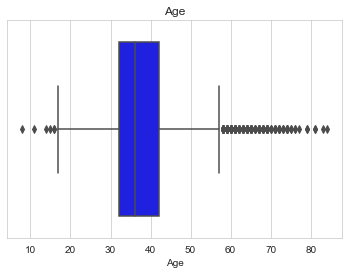

In [22]:
plt.title('Age')
sns.boxplot(prob2_data['Age'],orient='horizondal',color='blue')

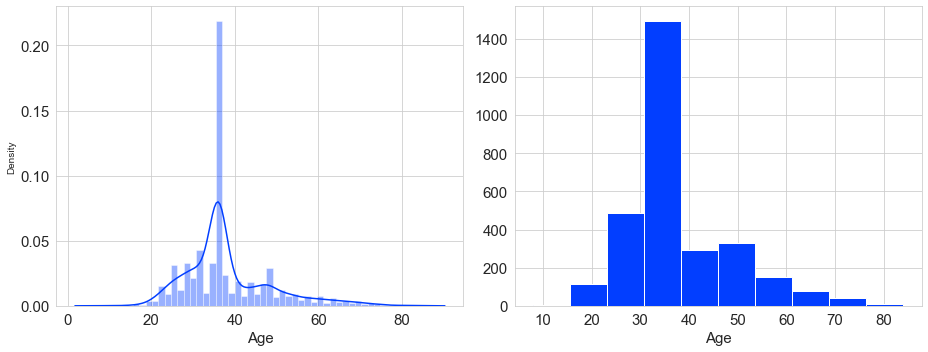

In [23]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(prob2_data['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(prob2_data['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Commision variable

In [24]:
print('Range of values: ', prob2_data['Commision'].max()-prob2_data['Commision'].min())

Range of values:  210.21


In [25]:
#Central values 
print('Minimum Commision: ', prob2_data['Commision'].min())
print('Maximum Commision: ',prob2_data['Commision'].max())
print('Mean value: ', prob2_data['Commision'].mean())
print('Median value: ',prob2_data['Commision'].median())
print('Standard deviation: ', prob2_data['Commision'].std())
print('Null values: ',prob2_data['Commision'].isnull().any())

Minimum Commision:  0.0
Maximum Commision:  210.21
Mean value:  14.529203333333266
Median value:  4.63
Standard deviation:  25.48145450662553
Null values:  False


In [27]:
#Quartiles

Q1=prob2_data['Commision'].quantile(q=0.25)
Q3=prob2_data['Commision'].quantile(q=0.75)
print('Commision - 1st Quartile (Q1) is: ', Q1)
print('Commision - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Commision is ', stats.iqr(prob2_data['Commision']))

Commision - 1st Quartile (Q1) is:  0.0
Commision - 3st Quartile (Q3) is:  17.235
Interquartile range (IQR) of Commision is  17.235


In [28]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Commision: ', L_outliers)
print('Upper outliers in Commision: ', U_outliers)

Lower outliers in Commision:  -25.8525
Upper outliers in Commision:  43.0875


In [29]:
print('Number of outliers in Commision upper : ', prob2_data[prob2_data['Commision']>43.0875]['Commision'].count())
print('Number of outliers in Commision lower : ', prob2_data[prob2_data['Commision']<-25.8525]['Commision'].count())
print('% of Outlier in Commision upper: ',round(prob2_data[prob2_data['Commision']>43.0875]['Commision'].count()*100/len(prob2_data)), '%')
print('% of Outlier in Commision lower: ',round(prob2_data[prob2_data['Commision']<-25.8525]['Commision'].count()*100/len(prob2_data)), '%')

Number of outliers in Commision upper :  362
Number of outliers in Commision lower :  0
% of Outlier in Commision upper:  12 %
% of Outlier in Commision lower:  0 %


<AxesSubplot:title={'center':'Commision'}, xlabel='Commision'>

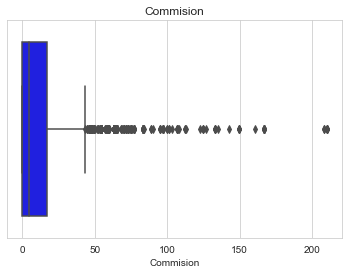

In [31]:
plt.title('Commision')
sns.boxplot(prob2_data['Commision'],orient='horizondal',color='blue')

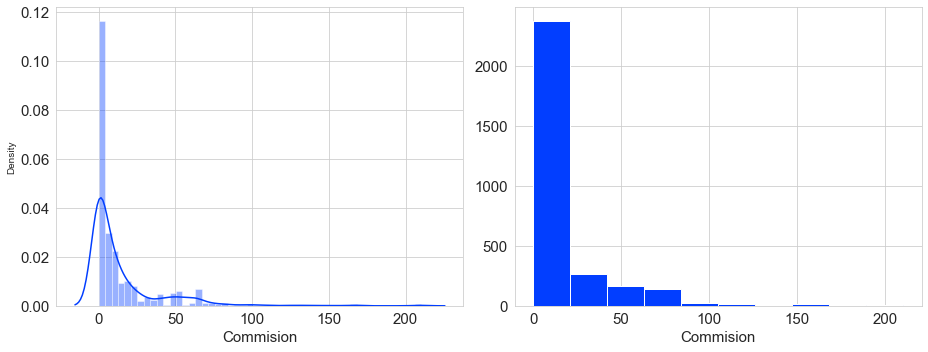

In [32]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(prob2_data['Commision'],ax=ax2)
ax2.set_xlabel('Commision', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(prob2_data['Commision'])
ax3.set_xlabel('Commision', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Duration variable

In [33]:
print('Range of values: ', prob2_data['Duration'].max()-prob2_data['Duration'].min())

Range of values:  4581


In [34]:
#Central values 
print('Minimum Duration: ', prob2_data['Duration'].min())
print('Maximum Duration: ',prob2_data['Duration'].max())
print('Mean value: ', prob2_data['Duration'].mean())
print('Median value: ',prob2_data['Duration'].median())
print('Standard deviation: ', prob2_data['Duration'].std())
print('Null values: ',prob2_data['Duration'].isnull().any())

Minimum Duration:  -1
Maximum Duration:  4580
Mean value:  70.00133333333333
Median value:  26.5
Standard deviation:  134.05331313253495
Null values:  False


In [35]:
#Quartiles

Q1=prob2_data['Duration'].quantile(q=0.25)
Q3=prob2_data['Duration'].quantile(q=0.75)
print('Duration - 1st Quartile (Q1) is: ', Q1)
print('Duration - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Duration is ', stats.iqr(prob2_data['Duration']))

Duration - 1st Quartile (Q1) is:  11.0
Duration - 3st Quartile (Q3) is:  63.0
Interquartile range (IQR) of Duration is  52.0


In [36]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Lower outliers in Duration:  -67.0
Upper outliers in Duration:  141.0


In [38]:
print('Number of outliers in Duration upper : ', prob2_data[prob2_data['Duration']>141.0]['Duration'].count())
print('Number of outliers in Duration lower : ', prob2_data[prob2_data['Duration']<-67.0]['Duration'].count())
print('% of Outlier in Duration upper: ',round(prob2_data[prob2_data['Duration']>141.0]['Duration'].count()*100/len(prob2_data)), '%')
print('% of Outlier in Duration lower: ',round(prob2_data[prob2_data['Duration']<-67.0]['Duration'].count()*100/len(prob2_data)), '%')

Number of outliers in Duration upper :  382
Number of outliers in Duration lower :  0
% of Outlier in Duration upper:  13 %
% of Outlier in Duration lower:  0 %


<AxesSubplot:title={'center':'Duration'}, xlabel='Duration'>

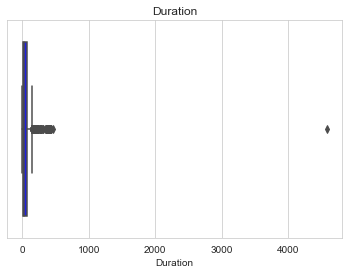

In [40]:
plt.title('Duration')
sns.boxplot(prob2_data['Duration'],orient='horizondal',color='blue')

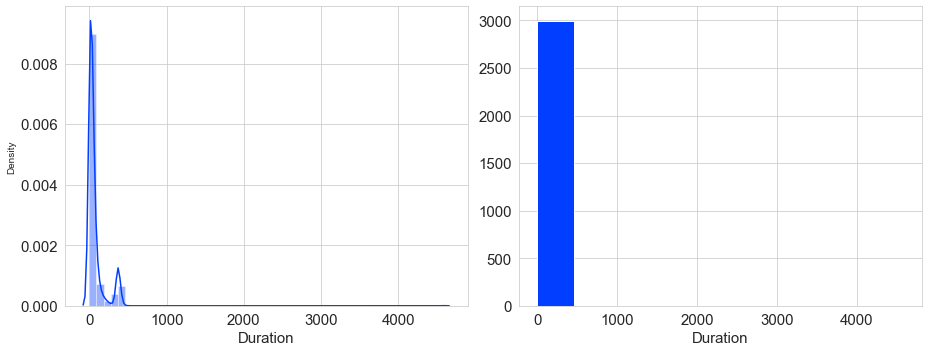

In [42]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(prob2_data['Duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(prob2_data['Duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Sales variable

In [43]:
print('Range of values: ', prob2_data['Sales'].max()-prob2_data['Sales'].min())

Range of values:  539.0


In [44]:
#Central values 
print('Minimum Sales: ', prob2_data['Sales'].min())
print('Maximum Sales: ',prob2_data['Sales'].max())
print('Mean value: ', prob2_data['Sales'].mean())
print('Median value: ',prob2_data['Sales'].median())
print('Standard deviation: ', prob2_data['Sales'].std())
print('Null values: ',prob2_data['Sales'].isnull().any())

Minimum Sales:  0.0
Maximum Sales:  539.0
Mean value:  60.24991333333344
Median value:  33.0
Standard deviation:  70.73395353143047
Null values:  False


In [45]:
#Quartiles

Q1=prob2_data['Sales'].quantile(q=0.25)
Q3=prob2_data['Sales'].quantile(q=0.75)
print('Sales - 1st Quartile (Q1) is: ', Q1)
print('Sales - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Sales is ', stats.iqr(prob2_data['Sales']))

Sales - 1st Quartile (Q1) is:  20.0
Sales - 3st Quartile (Q3) is:  69.0
Interquartile range (IQR) of Sales is  49.0


In [46]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Sales: ', L_outliers)
print('Upper outliers in Sales: ', U_outliers)

Lower outliers in Sales:  -53.5
Upper outliers in Sales:  142.5


In [47]:
print('Number of outliers in Sales upper : ', prob2_data[prob2_data['Sales']>142.5]['Sales'].count())
print('Number of outliers in Sales lower : ', prob2_data[prob2_data['Sales']<-53.5]['Sales'].count())
print('% of Outlier in Sales upper: ',round(prob2_data[prob2_data['Sales']>142.5]['Sales'].count()*100/len(prob2_data)), '%')
print('% of Outlier in Sales lower: ',round(prob2_data[prob2_data['Sales']<-53.5]['Sales'].count()*100/len(prob2_data)), '%')

Number of outliers in Sales upper :  353
Number of outliers in Sales lower :  0
% of Outlier in Sales upper:  12 %
% of Outlier in Sales lower:  0 %


<AxesSubplot:title={'center':'Sales'}, xlabel='Sales'>

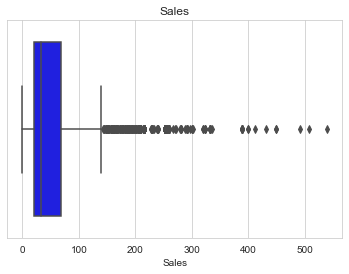

In [48]:
plt.title('Sales')
sns.boxplot(prob2_data['Sales'],orient='horizondal',color='blue')

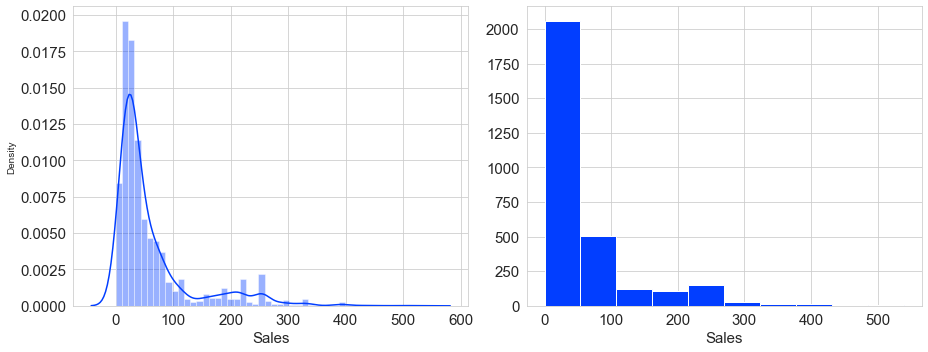

In [49]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(prob2_data['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(prob2_data['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

There are outliers in all the variables, but the sales and commision can be a geneui business value. Random Forest and CART can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is.

I will treat the outliers for the ANN model to compare the same after the all the steps just for comparsion.


# Categorical Variables

## Agency_Code

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

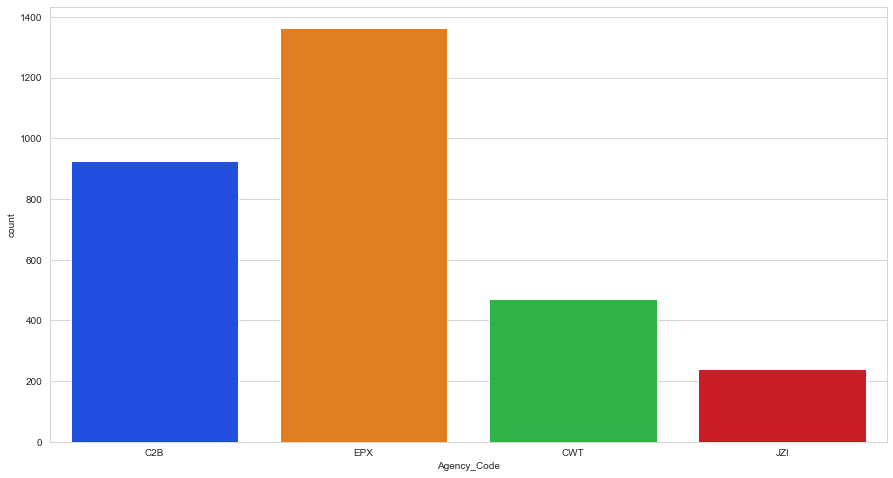

In [56]:
# Count Plot
plt.figure(figsize=(15,8))
sns.countplot(data = prob2_data, x = 'Agency_Code')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

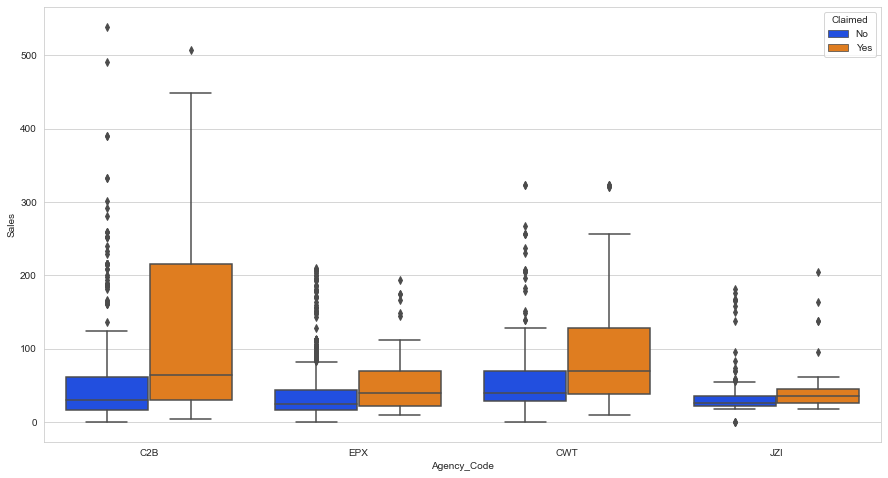

In [57]:
# Boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data = prob2_data, x='Agency_Code',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

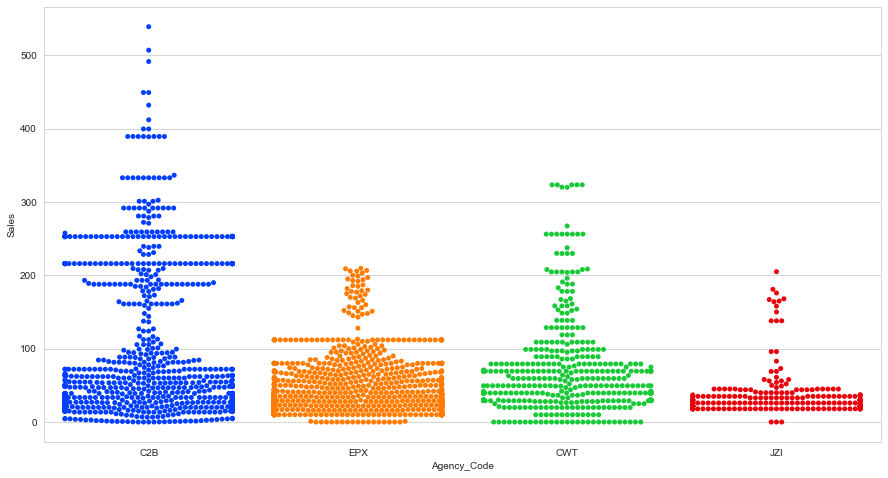

In [58]:
# Swarmpot
plt.figure(figsize=(15,8))
sns.swarmplot(data = prob2_data, x='Agency_Code',y='Sales')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

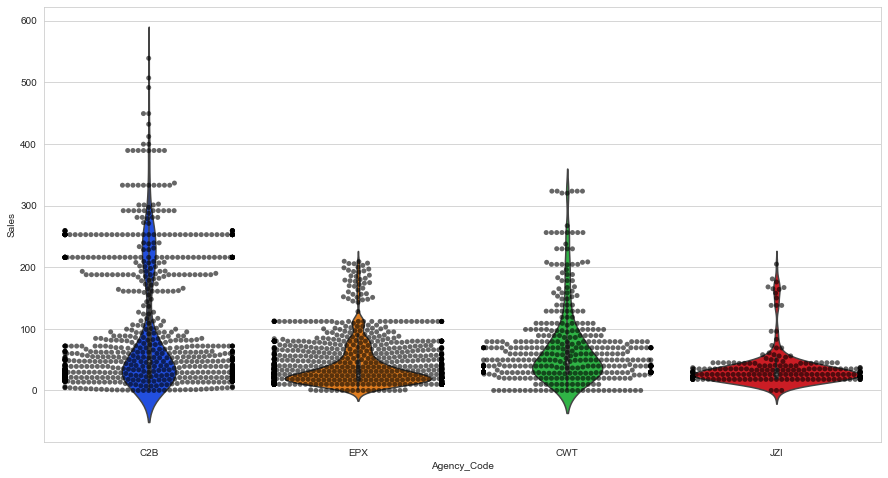

In [59]:
# Combine Violin plot and Swarmp plot
plt.figure(figsize=(15,8))
sns.violinplot(data = prob2_data, x='Agency_Code',y='Sales')
sns.swarmplot(data = prob2_data, x='Agency_Code',y='Sales', color = 'k', alpha = 0.6)

## Type

<AxesSubplot:xlabel='Type', ylabel='count'>

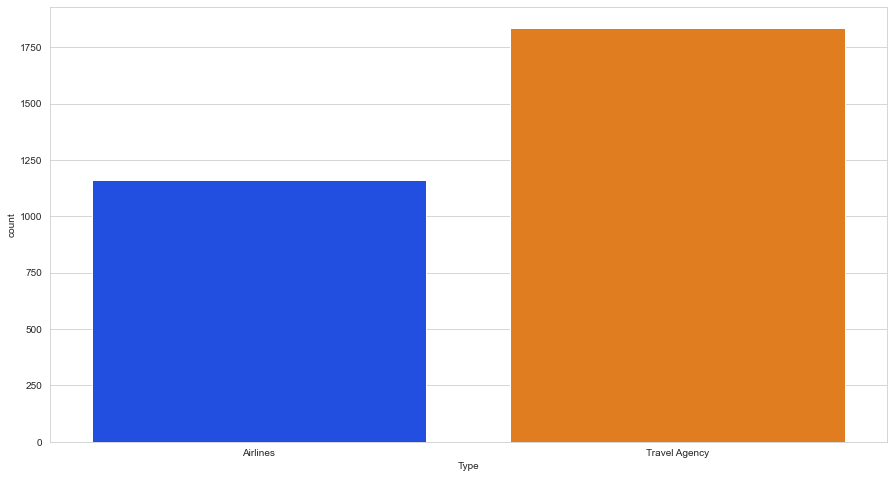

In [60]:
plt.figure(figsize=(15,8))
sns.countplot(data = prob2_data, x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

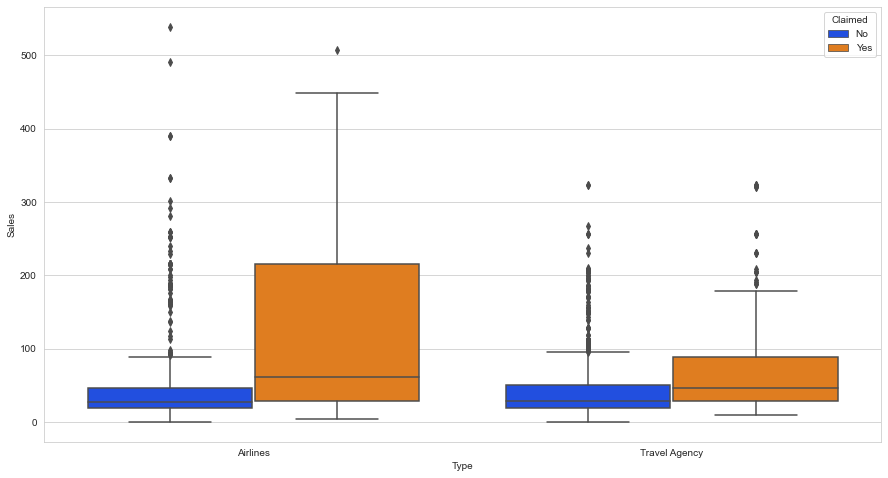

In [61]:
plt.figure(figsize=(15,8))
sns.boxplot(data = prob2_data, x='Type',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

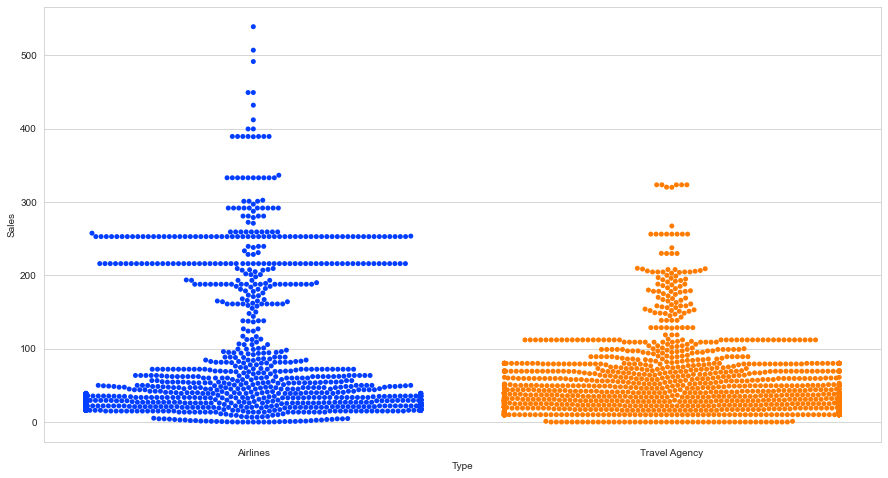

In [62]:
plt.figure(figsize=(15,8))
sns.swarmplot(data = prob2_data, x='Type',y='Sales')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

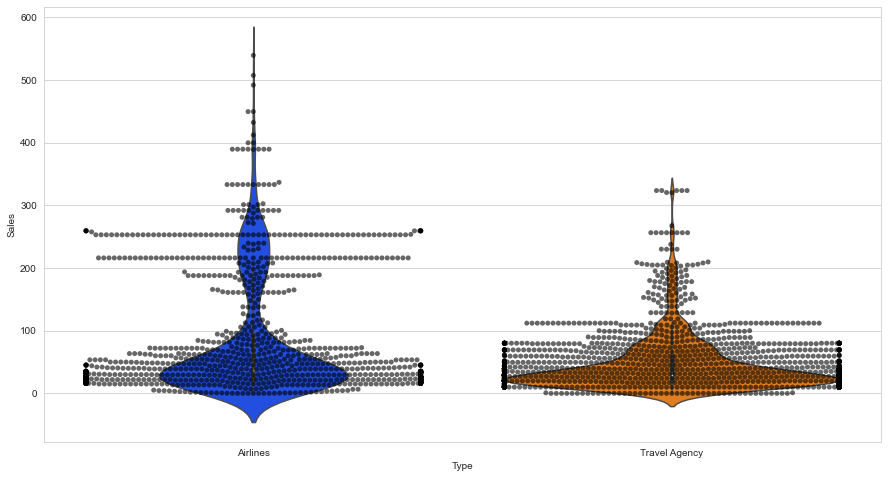

In [63]:
plt.figure(figsize=(15,8))
sns.violinplot(data = prob2_data, x='Type',y='Sales')
sns.swarmplot(data = prob2_data, x='Type',y='Sales', color = 'k', alpha = 0.6)

# Channel

<AxesSubplot:xlabel='Channel', ylabel='count'>

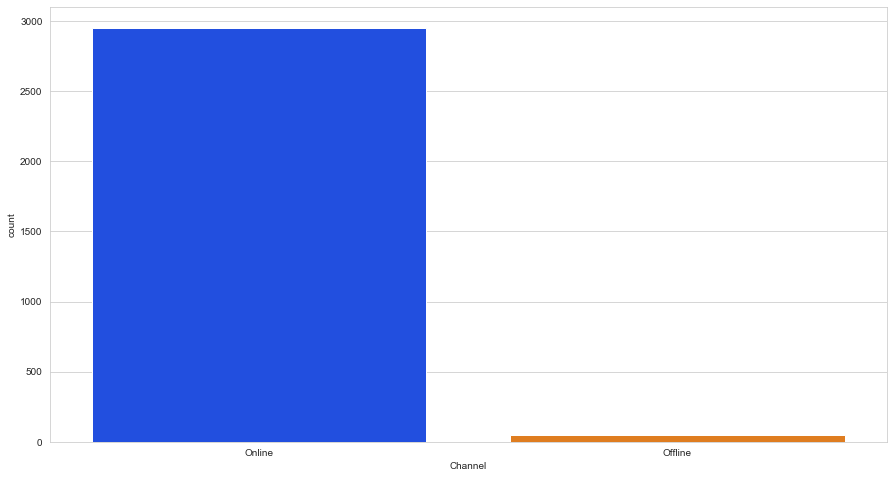

In [66]:
plt.figure(figsize=(15,8))
sns.countplot(data = prob2_data, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

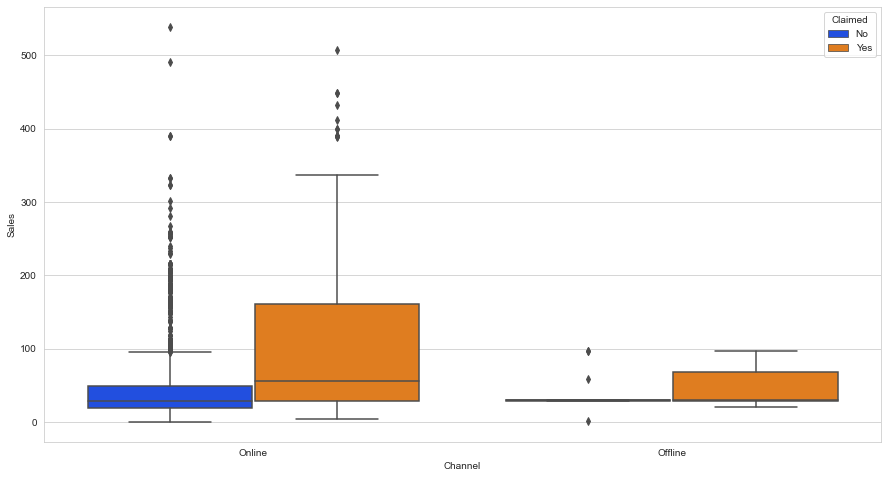

In [67]:
plt.figure(figsize=(15,8))
sns.boxplot(data = prob2_data, x='Channel',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

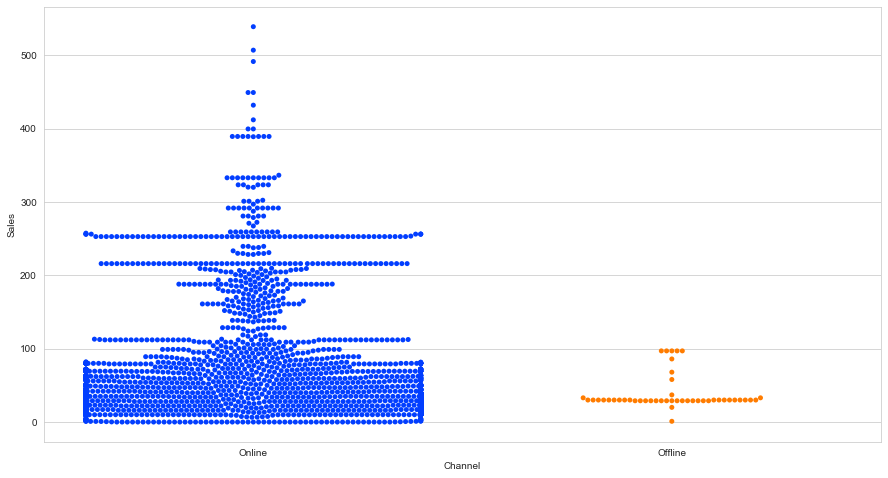

In [68]:
plt.figure(figsize=(15,8))
sns.swarmplot(data = prob2_data, x='Channel',y='Sales')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

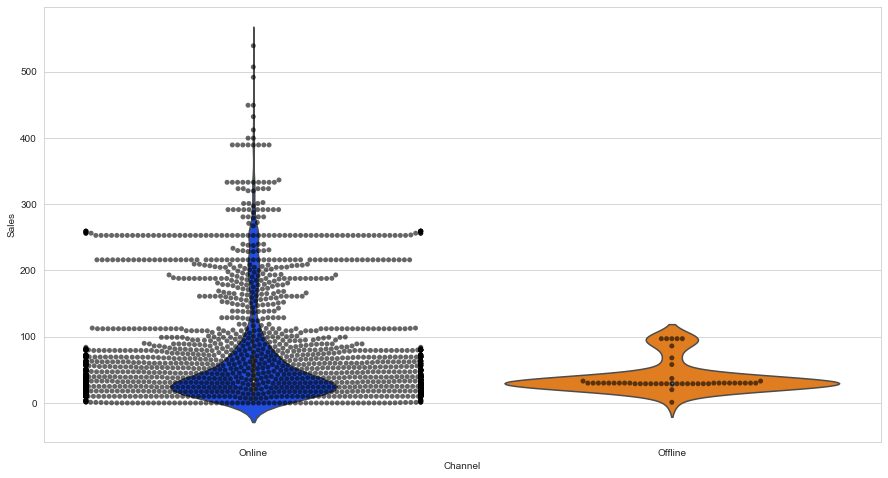

In [70]:
plt.figure(figsize=(15,8))
sns.violinplot(data = prob2_data, x='Channel',y='Sales')
sns.swarmplot(data = prob2_data, x='Channel',y='Sales', color = 'k', alpha = 0.6)

# Product Name

<AxesSubplot:xlabel='Product Name', ylabel='count'>

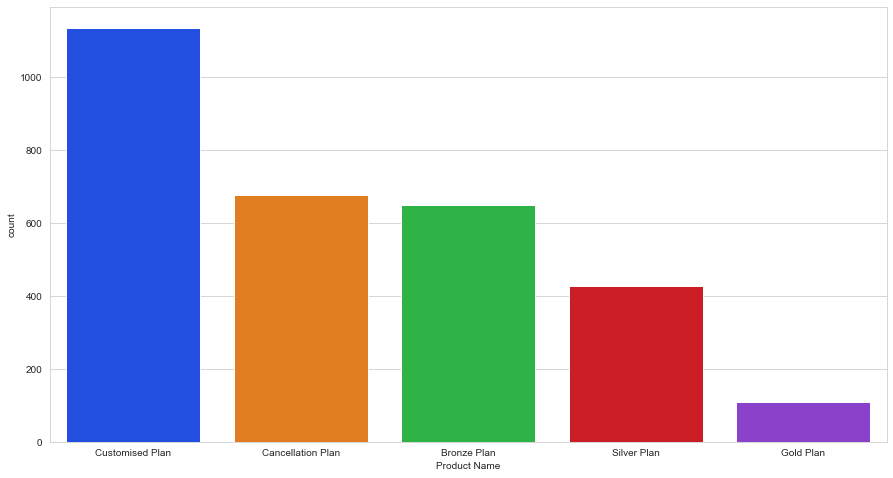

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(data = prob2_data, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

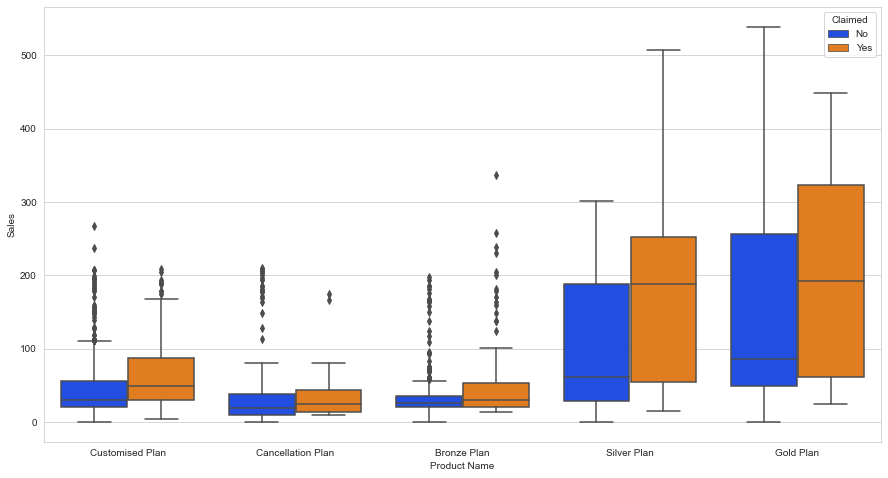

In [73]:
plt.figure(figsize=(15,8))
sns.boxplot(data = prob2_data, x='Product Name',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

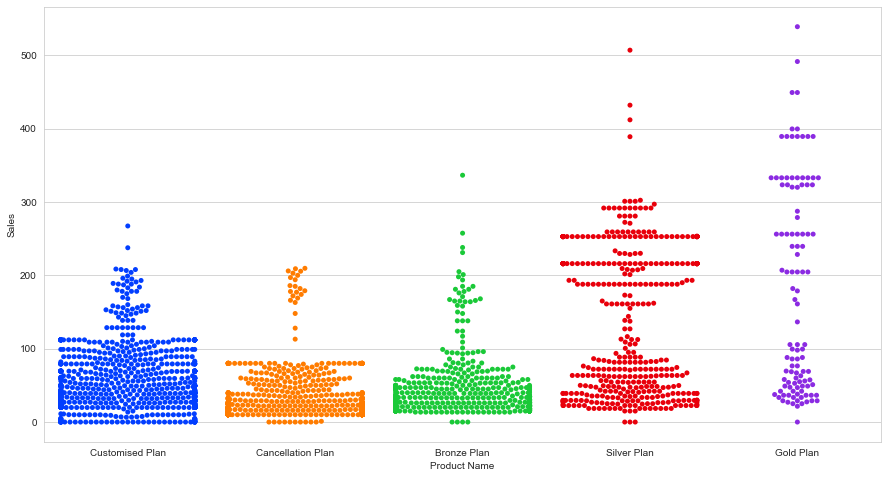

In [74]:
plt.figure(figsize=(15,8))
sns.swarmplot(data = prob2_data, x='Product Name',y='Sales')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

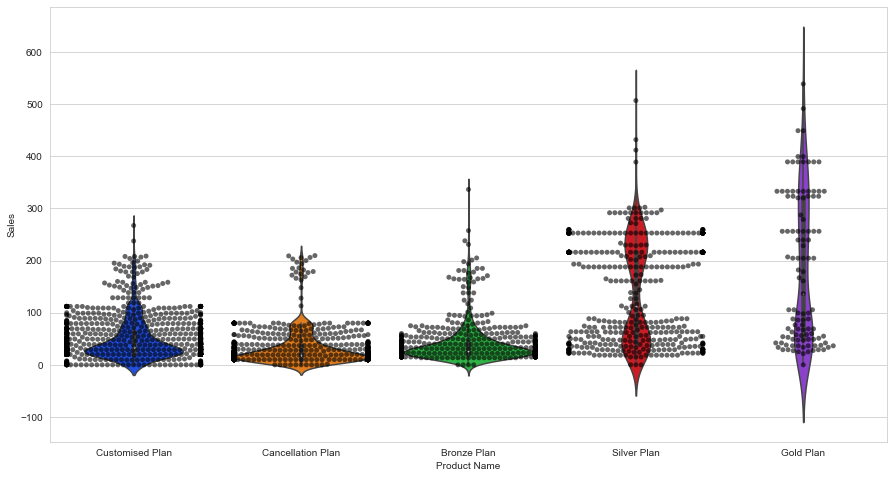

In [75]:
plt.figure(figsize=(15,8))
sns.violinplot(data = prob2_data, x='Product Name',y='Sales')
sns.swarmplot(data = prob2_data, x='Product Name',y='Sales', color = 'k', alpha = 0.6)

# Destination

<AxesSubplot:xlabel='Destination', ylabel='count'>

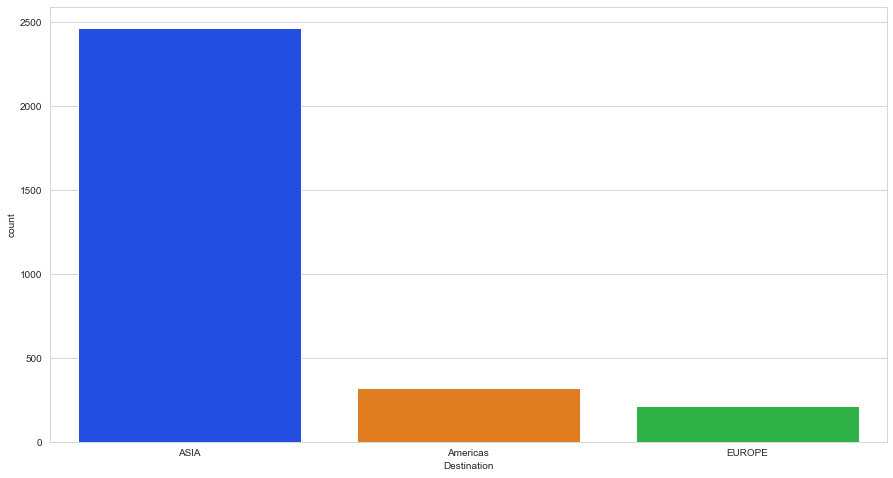

In [76]:
plt.figure(figsize=(15,8))
sns.countplot(data = prob2_data, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

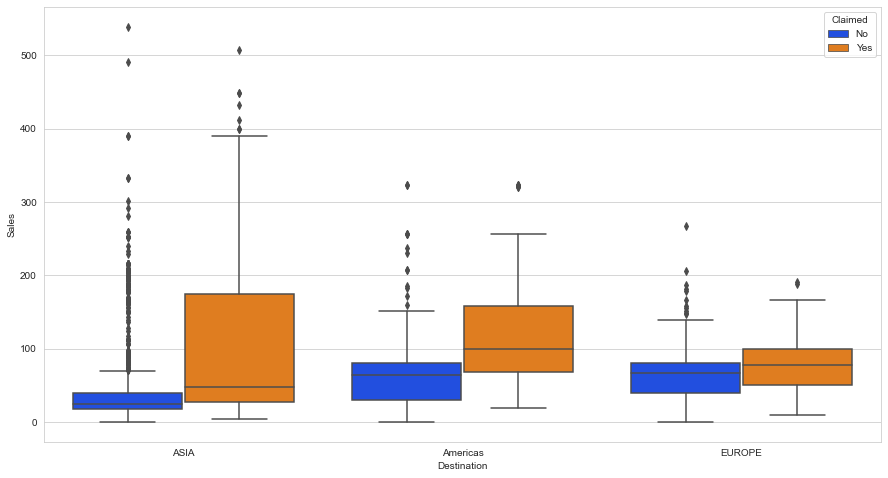

In [77]:
plt.figure(figsize=(15,8))
sns.boxplot(data = prob2_data, x='Destination',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

<Figure size 1080x576 with 0 Axes>

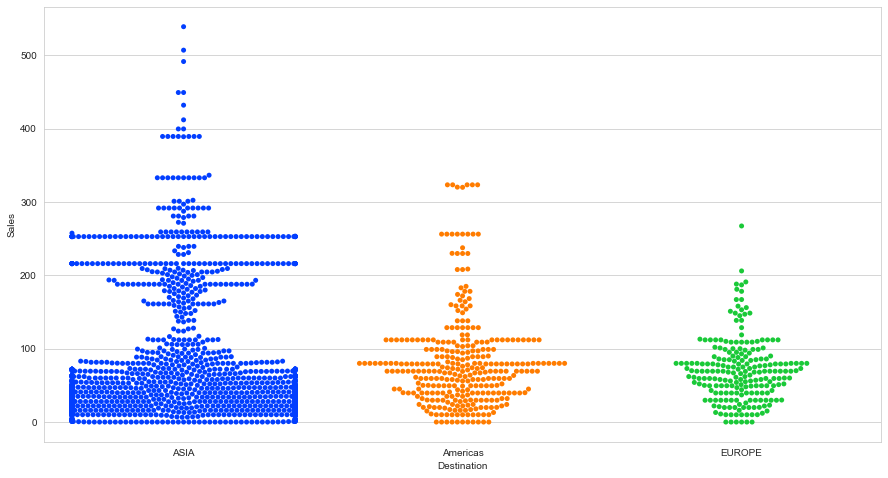

In [79]:
plt.figure(figsize=(15,8))
sns.swarmplot(data = prob2_data, x='Destination',y='Sales')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

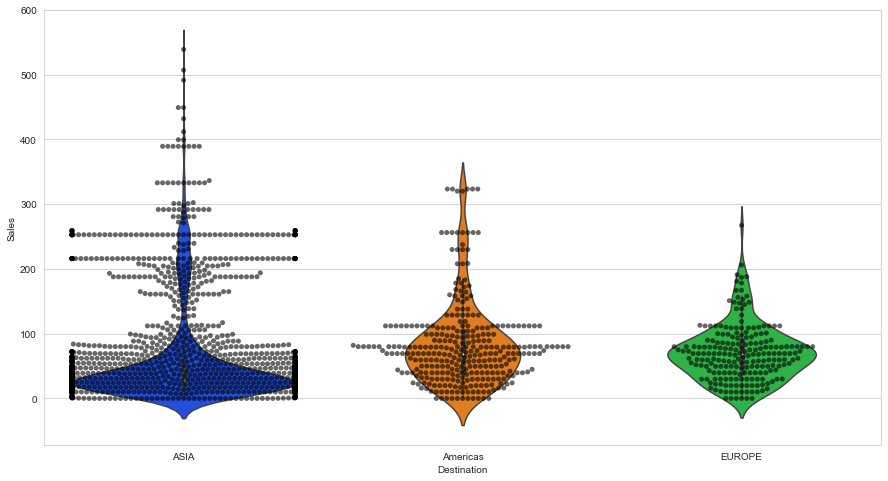

In [80]:
plt.figure(figsize=(15,8))
sns.violinplot(data = prob2_data, x='Destination',y='Sales')
sns.swarmplot(data = prob2_data, x='Destination',y='Sales', color = 'k', alpha = 0.6)

# Checking pairwise distribution of the continuous variables

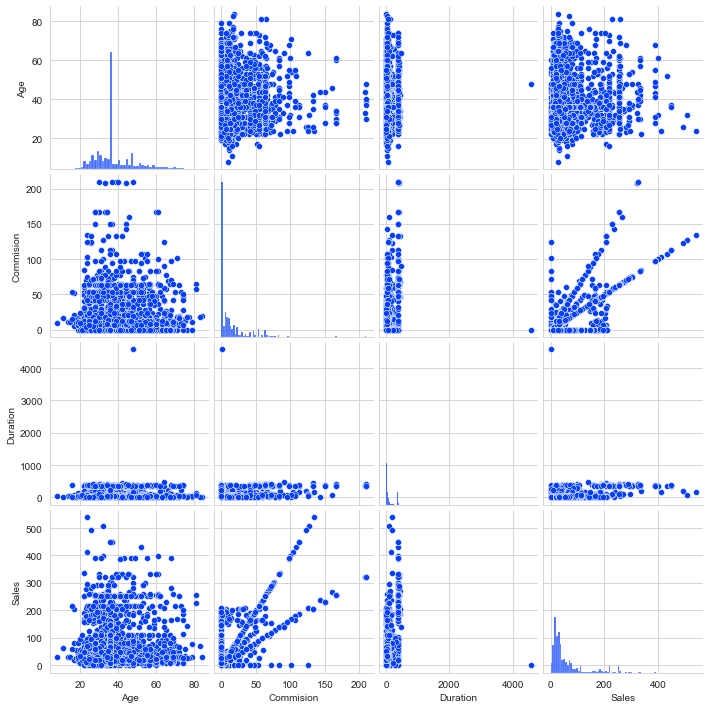

In [81]:
sns.pairplot(prob2_data[['Age', 'Commision', 
    'Duration', 'Sales']])

# Checking for Correlations

<AxesSubplot:>

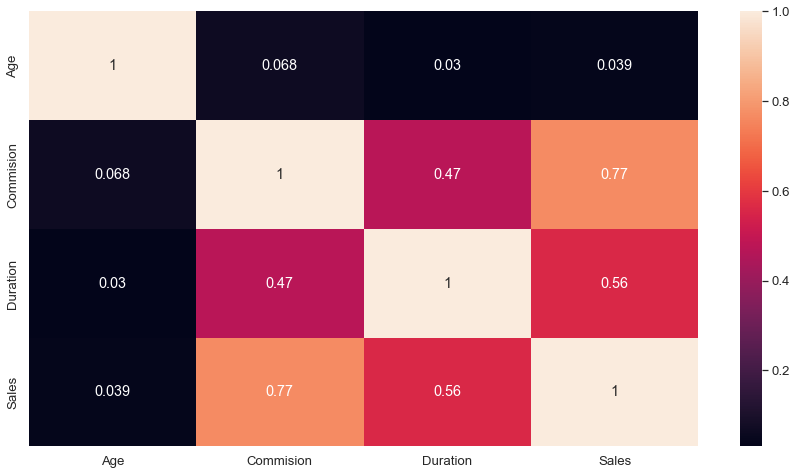

In [83]:
# construct heatmap with only continuous variables
plt.figure(figsize=(15,8))
sns.set(font_scale=1.2)
sns.heatmap(prob2_data[['Age', 'Commision', 
    'Duration', 'Sales']].corr(), annot=True)

# Converting all objects to categorical codes


In [86]:
for feature in prob2_data.columns: 
    if prob2_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(prob2_data[feature].unique()))
        print(pd.Categorical(prob2_data[feature].unique()).codes)
        prob2_data[feature] = pd.Categorical(prob2_data[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [87]:
prob2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [88]:
prob2_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


Proportion of 1s and 0s

In [89]:
prob2_data.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

## Extracting the target column into separate vectors for training set and test set

In [90]:
X = prob2_data.drop("Claimed", axis=1)

y = prob2_data.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


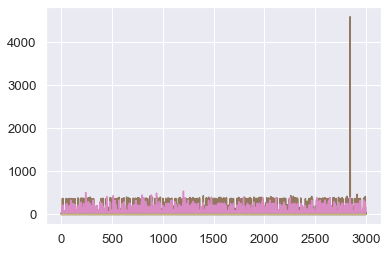

In [91]:
# prior to scaling 
plt.plot(X)
plt.show()

In [92]:
# Scaling the attributes.

from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


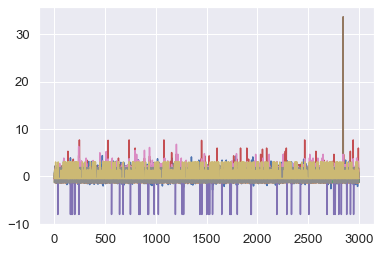

In [93]:
# prior to scaling 
plt.plot(X_scaled)
plt.show()

## Splitting data into training and test set

In [94]:

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

## Checking the dimensions of the training and test data


In [95]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


## Building a Decision Tree Classifie

In [96]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [97]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [98]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [99]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [100]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3.5,4.0,4.5, 5.0,5.5],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [250, 270, 280, 290, 300,310],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [101]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 3.5, 'min_samples_leaf': 44, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=3.5, min_samples_leaf=44,
                       min_samples_split=250, random_state=1)

In [102]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [103]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 4.85, 'min_samples_leaf': 44, 'min_samples_split': 260}


DecisionTreeClassifier(max_depth=4.85, min_samples_leaf=44,
                       min_samples_split=260, random_state=1)

## Generating Tree

In [104]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

## Variable Importance - DTCL

In [106]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.634112
Sales         0.220899
Product Name  0.086632
Commision     0.021881
Age           0.019940
Duration      0.016536
Type          0.000000
Channel       0.000000
Destination   0.000000


## Predicting on Training and Test dataset

In [107]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

## Getting the Predicted Classes and Probs

In [108]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.697947,0.302053
1,0.979452,0.020548
2,0.921171,0.078829
3,0.510417,0.489583
4,0.921171,0.078829


## Building a Random Forest Classifier

In [112]:
param_grid_rfcl = {
    'max_depth': [4,5,6],#20,30,40
    'max_features': [2,3,4,5],## 7,8,9
    'min_samples_leaf': [8,9,11,15],## 50,100
    'min_samples_split': [46,50,55], ## 60,70
    'n_estimators': [290,350,400] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [113]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 46, 'n_estimators': 350}


RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=8,
                       min_samples_split=46, n_estimators=350, random_state=1)

## Predicting the Training and Testing data

In [115]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

## Getting the Predicted Classes and Probs

In [116]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.778010,0.221990
1,0.971910,0.028090
2,0.904401,0.095599
3,0.651398,0.348602
4,0.868406,0.131594


## Variable Importance via RF

In [117]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.276015
Product Name  0.235583
Sales         0.152733
Commision     0.135997
Duration      0.077475
Type          0.071019
Age           0.039503
Destination   0.008971
Channel       0.002705


## Building a Neural Network Classifier

In [119]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [120]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

## Predicting the Training and Testing data

In [121]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

## Getting the Predicted Classes and Probs


In [122]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.822676,0.177324
1,0.933407,0.066593
2,0.918772,0.081228
3,0.688933,0.311067
4,0.913425,0.086575


# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

## CART - AUC and ROC for the training data

AUC: 0.823


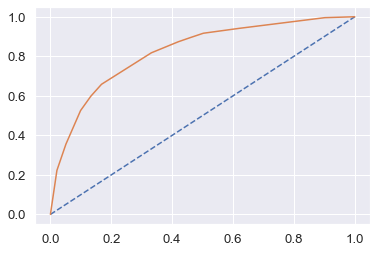

In [123]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

## CART -AUC and ROC for the test data

AUC: 0.801


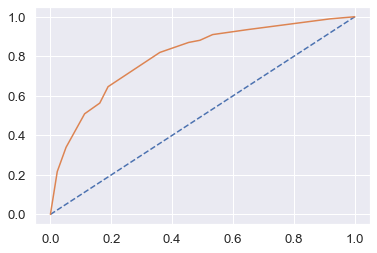

In [124]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

## CART Confusion Matrix and Classification Report for the training data

In [125]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1309,  144],
       [ 307,  340]])

In [126]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7852380952380953

In [127]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1453
           1       0.70      0.53      0.60       647

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [141]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.53
cart_train_f1  0.6


## CART Confusion Matrix and Classification Report for the testing data

In [129]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[553,  70],
       [136, 141]])

In [130]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.7711111111111111

In [131]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.51      0.58       277

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [142]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.67
cart_test_recall  0.51
cart_test_f1  0.58


## CART Conclusion

### Train Data:
- AUC: 82%
- Accuracy: 79%
- Precision: 70%
- f1-Score: 60%

### Test Data:
- AUC: 80%
- Accuracy: 77%
- Precision: 80%
- f1-Score: 84%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is the most important variable for predicting diabetes

## RF Model Performance Evaluation on Training data

In [137]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1297,  156],
       [ 255,  392]])

In [138]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8042857142857143

In [135]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.72      0.61      0.66       647

    accuracy                           0.80      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



In [136]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.61
rf_train_f1  0.66


Area under Curve is 0.8563713512840778


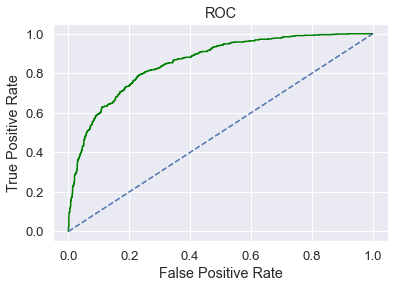

In [143]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [144]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[550,  73],
       [121, 156]])

In [145]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7844444444444445

In [146]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.68      0.56      0.62       277

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.78      0.78      0.78       900



In [147]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.56
rf_test_f1  0.62


Area under Curve is 0.8181994657271499


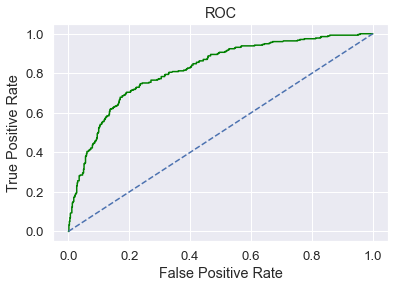

In [148]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

## Random Forest Conclusion

### Train Data:
- AUC: 86%
- Accuracy: 80%
- Precision: 72%
- f1-Score: 66%

### Test Data:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 62

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is again the most important variable for predicting diabetes

## NN Model Performance Evaluation on Training data

In [149]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1298,  155],
       [ 315,  332]])

In [150]:
nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

In [151]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [152]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.51
nn_train_f1  0.59


Area under Curve is 0.8166831721609928


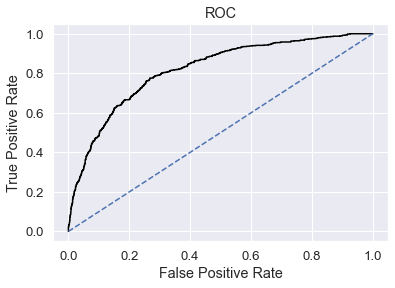

In [153]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [154]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[553,  70],
       [138, 139]])

In [155]:
nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7688888888888888

In [156]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



In [157]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.5
nn_test_f1  0.57


Area under Curve is 0.8044225275393896


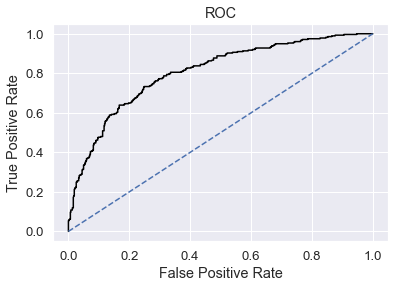

In [158]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

## Neural Network Conclusion


### Train Data:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 59
    
### Test Data:
- AUC: 80%
- Accuracy: 77%
- Precision: 67%
- f1-Score: 57%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

## Comparison of the performance metrics from the 3 models

In [160]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.80,0.78,0.78,0.77
AUC,0.82,0.80,0.86,0.82,0.82,0.80
Recall,0.53,0.51,0.61,0.56,0.51,0.50
Precision,0.70,0.67,0.72,0.68,0.68,0.67
F1 Score,0.60,0.58,0.66,0.62,0.59,0.57


## ROC Curve for the 3 models on the Training data

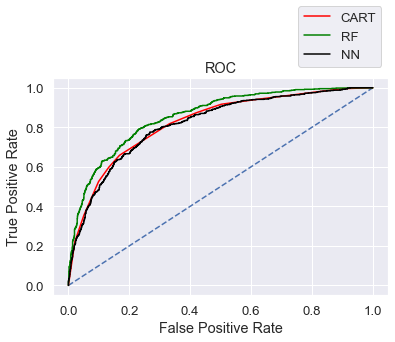

In [161]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

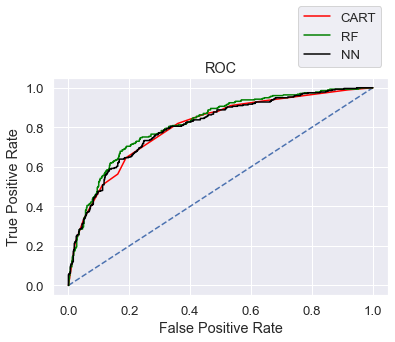

In [162]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### CONCLUSION :
I am selecting the RF model, as it has better accuracy, precsion, recall, f1 score better than other two CART & NN.

# 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

I strongly recommended we collect more real time unstructured data and past data if possible.

This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.

• Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. • As per the data 90% of insurance is done by online channel. • Other interesting fact, is almost all the offline business has a claimed associated, need to find why? • Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency • Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. • Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?

Key performance indicators (KPI) The KPI’s of insurance claims are: • Reduce claims cycle time • Increase customer satisfaction • Combat fraud • Optimize claims recovery • Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.